In [1]:
import pandas as pd #Import relevant libraries
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import linregress

In [2]:
os.getcwd() #Check file location

'C:\\Users\\Andrew\\Desktop\\Python'

In [3]:
df1 = pd.read_excel('COPD_Data.xlsx',sheet_name='Clinical data') #Import sheet1 from Excel
df1

,Patient identifier,County,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction
0,1,Greater Manchester,Female,Yes,No,2018-01-18,NaT,NaT,NaT,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,3
1,2,Hampshire,Female,Yes,No,2018-05-09,NaT,NaT,NaT,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,5
2,3,West Yorkshire,Female,Yes,Yes,2018-12-02,2019-02-25,2019-03-09,2019-04-02,55,255.0,311.300000,163.0,162.600000,Yes,Yes,Yes,5,4.0,7
3,4,Greater Manchester,Male,No,No,NaT,NaT,NaT,NaT,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4
4,5,Bedfordshire,Female,Yes,Yes,2018-03-31,2018-06-13,2018-06-25,2018-08-10,38,313.0,338.000000,247.0,208.000000,No,Yes,Yes,3,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12423,12424,Lancashire,Female,Yes,No,2018-02-26,NaT,NaT,NaT,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,4
12424,12425,Devon,Male,Yes,Yes,2018-04-07,2019-12-04,2019-12-16,NaT,61,234.0,NaN,208.0,NaN,NaN,NaN,NaN,4,NaN,6
12425,12426,Norfolk,Female,Yes,Yes,2018-04-21,2018-07-03,2018-07-24,2018-08-21,55,211.0,297.125000,163.0,256.250000,Yes,Yes,Yes,5,3.0,9
12426,12427,West Yorkshire,Female,Yes,No,2018-10-17,NaT,NaT,NaT,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2


In [4]:
df2 = pd.read_excel('COPD_Data.xlsx',sheet_name='Operational data') #Import sheet 2 from Excel file
df2['Staff sickness %'] = df2['Staff sickness %'] * 100 #Staff sickness % did not transfer correctly. *100 to return to normal.
df2

,County,Average number of staff,Staff sickness %
0,Bedfordshire,2,6.0
1,Berkshire,4,10.0
2,Bristol,1,3.0
3,Buckinghamshire,2,3.0
4,Cambridgeshire,7,3.0
5,Cheshire,9,2.0
6,City of London,1,7.0
7,Cornwall,5,0.0
8,County Durham,3,4.0
9,County Durham and,2,9.0


In [5]:
merged_df = pd.merge(df1, df2, on='County')
merged_df #Merging the data together on the County column. All data is now in one place.

,Patient identifier,County,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,...,ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Average number of staff,Staff sickness %
0,1,Greater Manchester,Female,Yes,No,2018-01-18,NaT,NaT,NaT,69,...,NaN,NaN,NaN,NaN,NaN,3,NaN,3,6,2.0
1,4,Greater Manchester,Male,No,No,NaT,NaT,NaT,NaT,71,...,NaN,NaN,NaN,NaN,NaN,3,NaN,4,6,2.0
2,10,Greater Manchester,Male,Yes,Yes,2018-05-31,2019-05-05,2019-05-16,2019-06-18,53,...,249.0,95.666667,No,No,Yes,3,2.0,6,6,2.0
3,37,Greater Manchester,Male,Yes,Yes,2018-10-24,2020-01-30,2020-02-08,NaT,30,...,222.0,NaN,NaN,NaN,NaN,3,NaN,7,6,2.0
4,43,Greater Manchester,Male,Yes,Yes,2018-07-24,2018-09-12,2018-09-24,2018-10-26,73,...,273.0,93.666667,Yes,No,Yes,3,1.0,10,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12422,12273,Oxfordshire,Male,Yes,No,2018-11-02,NaT,NaT,NaT,27,...,NaN,NaN,NaN,NaN,NaN,3,NaN,6,2,3.0
12423,12316,Oxfordshire,Female,Yes,No,2018-02-16,NaT,NaT,NaT,56,...,NaN,NaN,NaN,NaN,NaN,3,NaN,7,2,3.0
12424,12368,Oxfordshire,Female,No,No,NaT,NaT,NaT,NaT,59,...,NaN,NaN,NaN,NaN,NaN,4,NaN,2,2,3.0
12425,12390,Oxfordshire,Male,Yes,Yes,2018-07-26,2018-09-24,2018-10-05,2018-11-21,59,...,249.0,144.000000,Yes,Yes,Yes,4,3.0,10,2,3.0


# What are the demographics of PR patients in 2018?

In [6]:
#Demographics include county,gender, age and patient identifier

demographics = (merged_df
     .set_index('Enrolment date') #Select date from when the patient enrolled in the programme.
     .loc['2018-01-01':'2018-12-31'] #Select date range from 1st Jan 2018 to 31st Dec 2018
     .drop('Patient identifier',axis=1) #Drop Patient Identifier column as it is not useful
)
demographics

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12196\454477765.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  demographics = (merged_df


,County,Gender,Referred,Assessed,Referral date,Assessment date,Completion date,Age at initial appointment,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Average number of staff,Staff sickness %
Enrolment date,,,,,,,,,,,,,,,,,,,,
2018-09-24,Greater Manchester,Male,Yes,Yes,2018-07-24,2018-09-12,2018-10-26,73,307.0,272.333333,273.0,93.666667,Yes,No,Yes,3,1.0,10,6,2.0
2018-10-19,Greater Manchester,Male,Yes,Yes,2018-07-12,2018-10-03,2018-11-25,64,202.0,207.333333,294.0,165.666667,Yes,Yes,Yes,4,4.0,3,6,2.0
2018-07-03,Greater Manchester,Male,Yes,Yes,2018-03-30,2018-06-19,2018-07-30,62,223.0,281.333333,167.0,72.666667,Yes,Yes,Yes,4,1.0,10,6,2.0
2018-07-05,Greater Manchester,Male,Yes,Yes,2018-02-11,2018-06-19,2018-08-10,48,236.0,224.333333,240.0,195.666667,No,Yes,Yes,3,2.0,5,6,2.0
2018-08-09,Greater Manchester,Male,Yes,Yes,2018-05-29,2018-08-01,2018-09-23,41,254.0,297.333333,210.0,120.666667,No,No,Yes,5,3.0,8,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-03,Oxfordshire,Female,Yes,Yes,2018-01-11,2018-04-13,2018-06-08,38,204.0,214.500000,167.0,155.000000,Yes,No,Yes,5,4.0,6,2,3.0
2018-11-18,Oxfordshire,Female,Yes,Yes,2018-09-15,2018-10-31,2018-12-29,47,175.0,193.500000,201.0,220.000000,No,Yes,Yes,5,4.0,9,2,3.0
2018-07-27,Oxfordshire,Female,Yes,Yes,2018-04-29,2018-07-10,2018-09-09,57,311.0,316.500000,209.0,140.000000,No,Yes,Yes,3,2.0,5,2,3.0


In [7]:
demographics['County'].unique() #locating unique values. Trying to find name of County Durham and -- it is County Durham\xa0and

array(['Greater Manchester', 'Hampshire', 'West Yorkshire',
       'Bedfordshire', 'Kent', 'Leicestershire', 'South Yorkshire',
       'Northamptonshire', 'Cheshire', 'Greater London', 'Worcestershire',
       'East Sussex', 'Derbyshire', 'Staffordshire',
       'East Riding of Yorkshire', 'West Midlands', 'Berkshire',
       'Tyne and Wear', 'West Sussex', 'Merseyside', 'Buckinghamshire',
       'Hertfordshire', 'Essex', 'Surrey', 'Devon', 'Cumbria', 'Somerset',
       'Gloucestershire', 'Lancashire', 'Cambridgeshire', 'Wiltshire',
       'Lincolnshire', 'Warwickshire', 'Suffolk', 'Dorset',
       'Nottinghamshire', 'North Yorkshire', 'County Durham\xa0and',
       'County Durham', 'Rutland', 'Norfolk', 'Cornwall', 'Bristol',
       'Shropshire', 'Northumberland', 'Isle of Wight', 'Herefordshire',
       'Oxfordshire'], dtype=object)

In [8]:
demographics[demographics['County'] == 'County Durham\xa0and'] #Locating the County Durham values.

,County,Gender,Referred,Assessed,Referral date,Assessment date,Completion date,Age at initial appointment,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Average number of staff,Staff sickness %
Enrolment date,,,,,,,,,,,,,,,,,,,,
2018-06-04,County Durham and,Female,Yes,Yes,2018-05-04,2018-05-14,2018-07-25,66,203.0,287.0,286.0,385.0,Yes,Yes,Yes,4,2.0,10,2,9.0
2018-08-10,County Durham and,Male,Yes,Yes,2018-02-11,2018-08-01,2018-09-20,37,232.0,305.0,203.0,276.0,Yes,Yes,Yes,3,2.0,7,2,9.0
2018-10-26,County Durham and,Female,Yes,Yes,2018-08-12,2018-10-11,2018-12-06,67,201.0,267.0,326.0,439.0,Yes,Yes,Yes,4,3.0,10,2,9.0
2018-05-31,County Durham and,Female,Yes,Yes,2018-01-20,2018-05-22,2018-07-13,47,264.0,350.0,232.0,203.0,Yes,Yes,Yes,3,2.0,6,2,9.0
2018-05-21,County Durham and,Male,Yes,Yes,2018-02-16,2018-05-03,2018-06-21,73,316.0,361.0,291.0,395.0,No,Yes,Yes,3,2.0,8,2,9.0
2018-10-14,County Durham and,Female,Yes,Yes,2018-07-20,2018-09-29,2018-11-24,47,256.0,309.0,217.0,296.0,Yes,No,Yes,3,2.0,9,2,9.0
2018-12-26,County Durham and,Male,Yes,Yes,2018-09-22,2018-12-17,2019-02-11,80,220.0,298.0,291.0,319.0,Yes,Yes,Yes,4,4.0,6,2,9.0
2018-10-28,County Durham and,Female,Yes,Yes,2018-08-15,2018-10-15,2018-11-26,73,301.0,380.0,159.0,228.0,No,Yes,Yes,4,5.0,1,2,9.0
2018-11-02,County Durham and,Male,Yes,Yes,2018-09-11,2018-10-25,2018-12-19,76,289.0,351.0,270.0,300.0,Yes,Yes,Yes,3,2.0,8,2,9.0


In [9]:
demographics['County'] = demographics['County'].replace('County Durham\xa0and', 'County Durham') #Replacing /xa0and with County Durham
demographics[demographics['County'] == 'County Durham'] #118 rows returned. Successfully renamed.

,County,Gender,Referred,Assessed,Referral date,Assessment date,Completion date,Age at initial appointment,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Average number of staff,Staff sickness %
Enrolment date,,,,,,,,,,,,,,,,,,,,
2018-06-04,County Durham,Female,Yes,Yes,2018-05-04,2018-05-14,2018-07-25,66,203.0,287.0,286.0,385.0,Yes,Yes,Yes,4,2.0,10,2,9.0
2018-08-10,County Durham,Male,Yes,Yes,2018-02-11,2018-08-01,2018-09-20,37,232.0,305.0,203.0,276.0,Yes,Yes,Yes,3,2.0,7,2,9.0
2018-10-26,County Durham,Female,Yes,Yes,2018-08-12,2018-10-11,2018-12-06,67,201.0,267.0,326.0,439.0,Yes,Yes,Yes,4,3.0,10,2,9.0
2018-05-31,County Durham,Female,Yes,Yes,2018-01-20,2018-05-22,2018-07-13,47,264.0,350.0,232.0,203.0,Yes,Yes,Yes,3,2.0,6,2,9.0
2018-05-21,County Durham,Male,Yes,Yes,2018-02-16,2018-05-03,2018-06-21,73,316.0,361.0,291.0,395.0,No,Yes,Yes,3,2.0,8,2,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-26,County Durham,Male,Yes,Yes,2018-09-02,2018-10-13,2018-12-14,56,315.0,414.0,166.0,191.0,Yes,Yes,Yes,4,2.0,10,3,4.0
2018-08-06,County Durham,Female,Yes,Yes,2018-07-03,2018-07-22,2018-09-18,72,196.0,251.0,237.0,302.0,Yes,Yes,Yes,4,3.0,10,3,4.0
2018-11-06,County Durham,Female,Yes,Yes,2018-07-22,2018-10-21,2018-12-04,64,324.0,372.0,304.0,299.0,No,No,Yes,4,3.0,8,3,4.0


In [10]:
#Removing outlier Jeffrey Smith Sr as he is a patient not a county.
demographics = demographics[demographics.County != 'Jeffrey Smith Sr.']

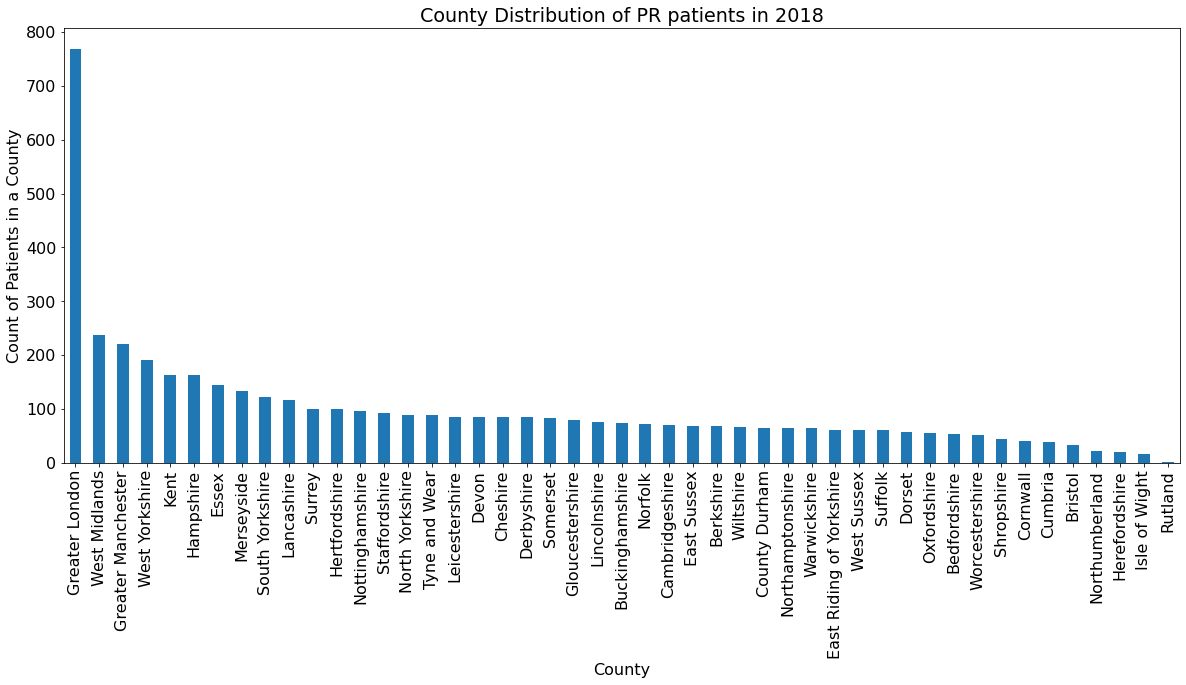

In [11]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 16})
County = demographics.County.value_counts() #Count the number of times a county appeared in 2018.
County_counts = County.plot.bar() #Create a bar chart of the count of patients in a county
plt.title('County Distribution of PR patients in 2018')
plt.xlabel('County')
plt.ylabel('Count of Patients in a County')
plt.show()

In [12]:
demographics = demographics.rename(columns={'Age at initial appointment':'Age'}) #Rename column to age

In [13]:
demographics = demographics[demographics.Age != '#'] #Removing the # outlier that was present in age bar chart

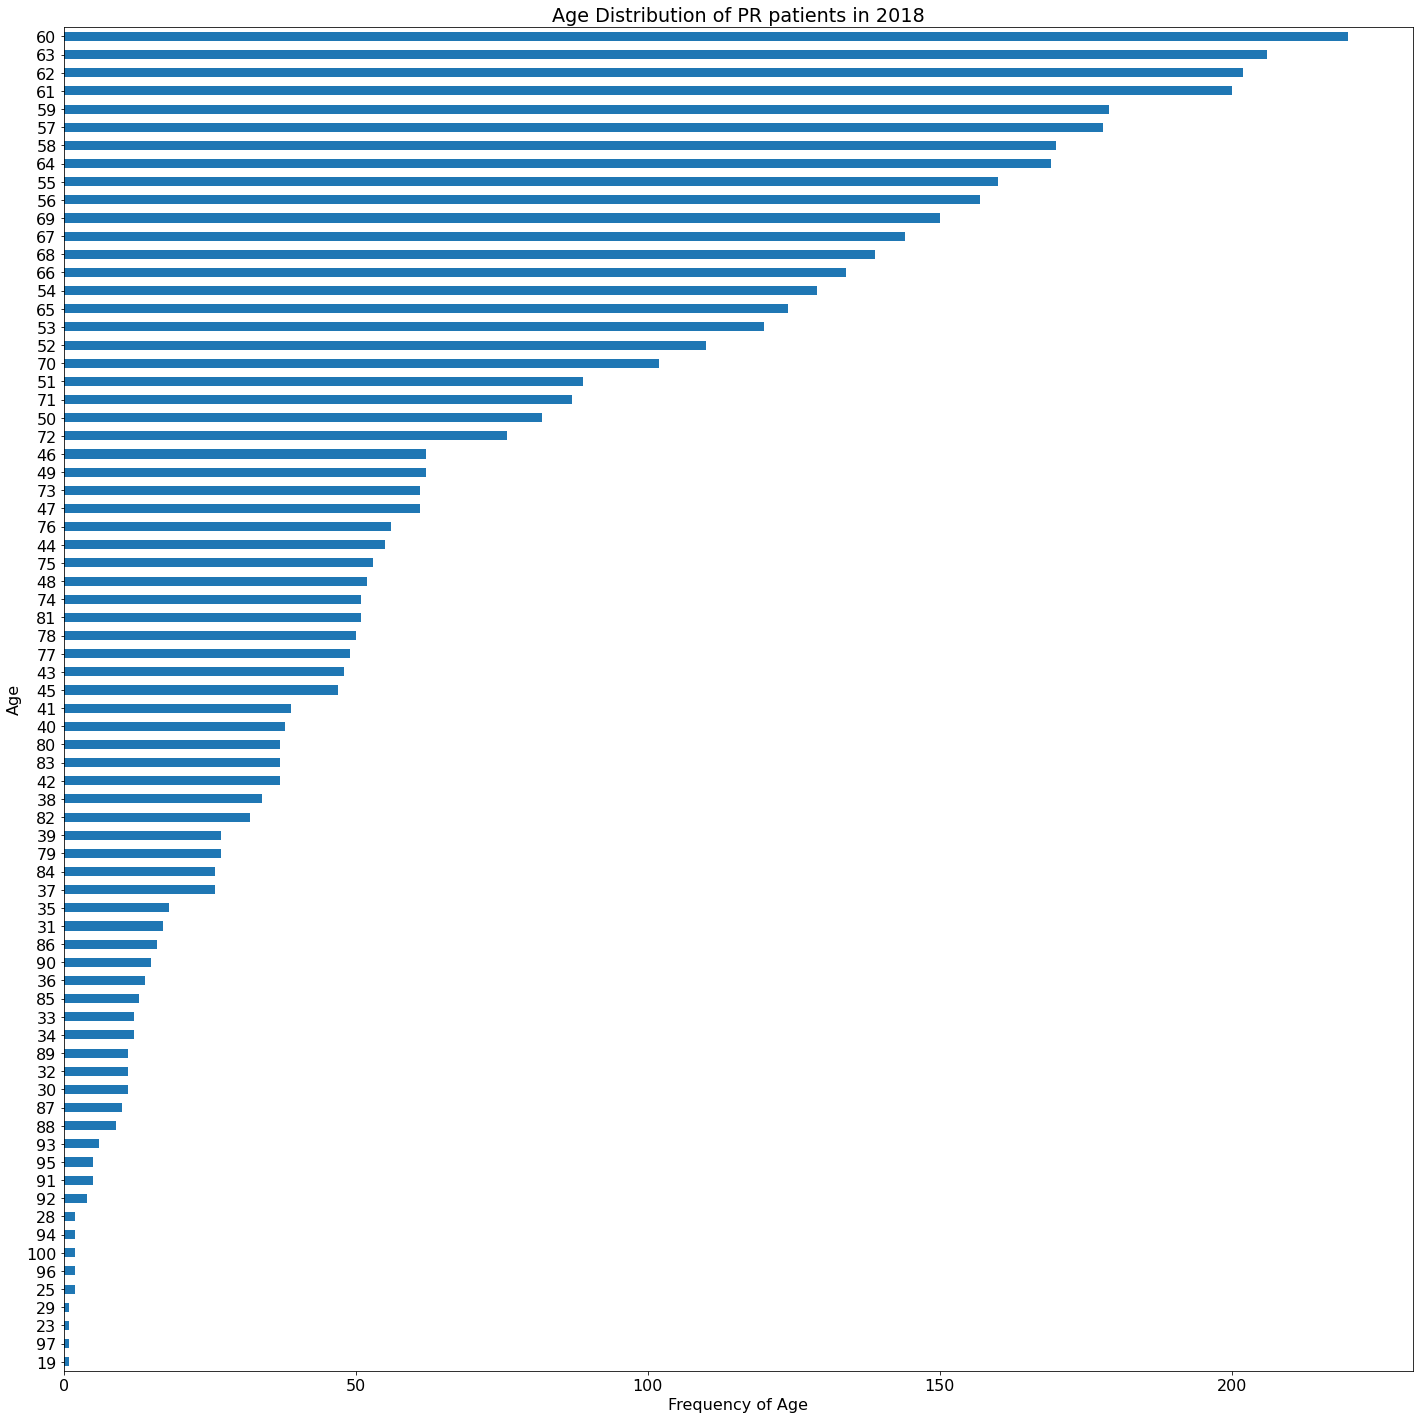

In [14]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 16})
Age = demographics.Age.value_counts().sort_values(ascending=True) #Sort the values by ascending order of count
Age_counts = Age.plot.barh() #Horizontal bar chart to plot count of age in 2018
plt.title('Age Distribution of PR patients in 2018')
plt.xlabel('Frequency of Age')
plt.ylabel('Age')
plt.tight_layout()
plt.show()
#This tells us that older people are more prone than middle aged at coming through the programme. elaborate further in future.

In [15]:
demographics.count() #Total of 4648 rows

County                               4648
Gender                               4648
Referred                             4648
Assessed                             4648
Referral date                        4419
Assessment date                      4648
Completion date                      4648
Age                                  4648
6MWT Before PR (m)                   4648
6MWT After PR (m) [MCID = 30m]       4648
ISWT Before PR (m)                   4648
ISWT After PR (m) [MCID = 48m]       4648
Practice 6MWT carried out?           4648
Practice ISWT carried out?           4648
Exercise plan given at discharge?    4648
MRC Before PR                        4648
MRC After PR                         4648
Patient satisfaction                 4648
Average number of staff              4648
Staff sickness %                     4648
dtype: int64

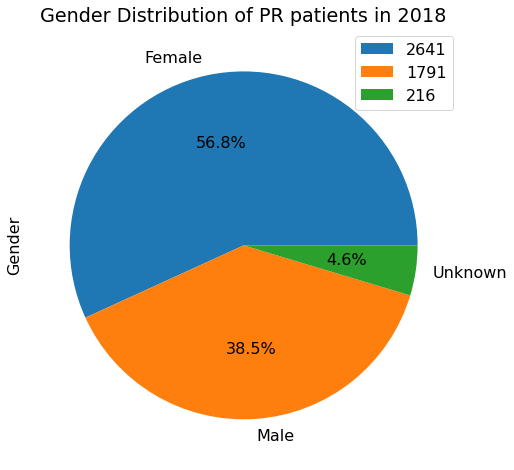

In [16]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 16})
Gender = demographics.Gender.value_counts() #Count of genders
Gender_counts = Gender.plot.pie(autopct='%1.1f%%') #Using a pie plot
plt.title('Gender Distribution of PR patients in 2018')
plt.legend(labels=Gender, loc="best") #Total gender = 4648 matching above.
plt.show()

# How are Kent, Surrey & Sussex performing against the rest of the country? Any key differences?

In [17]:
Kent = (df1
     .set_index('County')
     .loc[['Kent']]
)
Kent1 = Kent.describe().drop('Patient identifier',axis=1)

In [18]:
Surrey = (df1
     .set_index('County')
     .loc[['Surrey']]
)
Surrey1 = Surrey.describe().drop('Patient identifier',axis=1)

In [19]:
WestSussex = (df1
     .set_index('County')
     .loc[['West Sussex']]
)
WestSussex.describe().drop('Patient identifier',axis=1)

,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],MRC Before PR,MRC After PR,Patient satisfaction
count,116.000000,103.00000,116.000000,103.000000,187.000000,103.000000,187.000000
mean,247.948276,307.11165,247.620690,249.825243,3.668449,2.106796,6.786096
std,43.648964,56.06950,42.337907,67.549028,0.701166,0.895661,2.839283
min,170.000000,182.50000,133.000000,111.000000,3.000000,1.000000,1.000000
25%,214.000000,272.00000,219.750000,201.500000,3.000000,1.000000,5.000000
50%,249.500000,312.50000,246.500000,254.000000,4.000000,2.000000,7.000000
75%,282.250000,345.00000,280.250000,300.000000,4.000000,3.000000,10.000000
max,329.000000,437.50000,321.000000,414.000000,5.000000,5.000000,10.000000


In [20]:
EastSussex = (df1
     .set_index('County')
     .loc[['East Sussex']]
)
EastSussex.describe().drop('Patient identifier',axis=1)

,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],MRC Before PR,MRC After PR,Patient satisfaction
count,115.000000,103.000000,115.000000,103.000000,183.000000,103.000000,183.000000
mean,252.321739,266.354369,243.452174,159.640777,3.677596,3.281553,4.836066
std,39.581705,50.319257,45.637443,64.286560,0.695267,0.994273,2.264249
min,175.000000,152.500000,119.000000,11.000000,3.000000,1.000000,1.000000
25%,226.500000,234.000000,208.500000,118.000000,3.000000,3.000000,3.000000
50%,250.000000,267.500000,255.000000,161.000000,4.000000,3.000000,5.000000
75%,278.500000,302.500000,278.500000,208.500000,4.000000,4.000000,6.500000
max,327.000000,388.500000,321.000000,318.000000,5.000000,5.000000,10.000000


In [21]:
Sussex = pd.concat([EastSussex,WestSussex])#Merge east and west
Sussex.rename(index={"West Sussex":"Sussex","East Sussex":"Sussex"}, inplace=True) #Rename to sussex for visualisation
Sussex1 = Sussex.describe().drop('Patient identifier',axis=1) #Drop patient identifier
Sussex1

,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],MRC Before PR,MRC After PR,Patient satisfaction
count,231.000000,206.000000,231.000000,206.00000,370.000000,206.000000,370.000000
mean,250.125541,286.733010,245.545455,204.73301,3.672973,2.694175,5.821622
std,41.640875,56.933115,43.965267,79.81125,0.697323,1.112530,2.746877
min,170.000000,152.500000,119.000000,11.00000,3.000000,1.000000,1.000000
25%,221.000000,241.750000,217.000000,147.50000,3.000000,2.000000,4.000000
50%,250.000000,290.500000,251.000000,202.50000,4.000000,3.000000,6.000000
75%,280.000000,326.250000,280.000000,265.00000,4.000000,3.000000,8.000000
max,329.000000,437.500000,321.000000,414.00000,5.000000,5.000000,10.000000


In [22]:
Sussex #Viewing dataframe. all rows have been renamed Sussex.

,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction
County,,,,,,,,,,,,,,,,,,,
Sussex,18,Male,Yes,Yes,2018-12-14,2019-11-01,2019-11-15,2019-12-17,55,200.0,196.5,249.0,158.0,Yes,No,Yes,4,4.0,2
Sussex,28,Male,Yes,No,2018-10-30,NaT,NaT,NaT,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,7
Sussex,97,Male,Yes,Yes,2018-04-28,2018-06-28,2018-07-10,2018-08-10,70,218.0,227.5,253.0,261.0,No,Yes,No,4,3.0,5
Sussex,493,Female,Yes,Yes,2018-09-12,2018-11-11,2018-11-22,2018-12-31,69,278.0,298.5,214.0,143.0,No,Yes,Yes,4,4.0,6
Sussex,599,Male,Yes,Yes,2018-12-29,2019-04-30,2019-05-15,2019-06-15,37,202.0,178.5,189.0,140.0,No,No,Yes,4,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sussex,12319,Female,Yes,Yes,2018-04-15,2018-07-09,2018-07-26,2018-09-08,62,220.0,266.5,220.0,323.0,Yes,Yes,Yes,4,2.0,10
Sussex,12334,Female,No,No,2020-01-01,2020-01-01,2020-01-14,2020-02-13,73,262.0,317.5,229.0,176.0,Yes,No,Yes,4,3.0,5
Sussex,12346,Male,No,No,NaT,NaT,NaT,NaT,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,5


In [23]:
RoC = (df1
    .set_index('County') #Set index to County for slicing through data
    .drop(['East Sussex','West Sussex','Kent','Surrey'],axis=0) #dropping KSS counties
)
RoC1 = RoC.describe().drop('Patient identifier',axis=1)
RoC1 #Creating the rest of the country dataframe

,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],MRC Before PR,MRC After PR,Patient satisfaction
count,7290.000000,6240.000000,7290.000000,6240.000000,11394.000000,6240.000000,11394.000000
mean,258.353361,314.955256,242.487243,251.539679,3.625592,2.368590,6.285940
std,43.991144,58.694055,44.846681,75.736759,0.695106,1.075619,2.685551
min,168.000000,119.666667,110.000000,-30.000000,3.000000,1.000000,1.000000
25%,229.000000,274.325000,213.000000,202.775926,3.000000,2.000000,4.000000
50%,260.000000,317.333333,247.000000,256.633333,4.000000,2.000000,6.000000
75%,295.000000,357.308333,278.000000,305.571429,4.000000,3.000000,9.000000
max,330.000000,451.333333,330.000000,439.666667,5.000000,5.000000,10.000000


In [24]:
RoC #Checking the dataframe

,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction
County,,,,,,,,,,,,,,,,,,,
Greater Manchester,1,Female,Yes,No,2018-01-18,NaT,NaT,NaT,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,3
Hampshire,2,Female,Yes,No,2018-05-09,NaT,NaT,NaT,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,5
West Yorkshire,3,Female,Yes,Yes,2018-12-02,2019-02-25,2019-03-09,2019-04-02,55,255.0,311.300000,163.0,162.600000,Yes,Yes,Yes,5,4.0,7
Greater Manchester,4,Male,No,No,NaT,NaT,NaT,NaT,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4
Bedfordshire,5,Female,Yes,Yes,2018-03-31,2018-06-13,2018-06-25,2018-08-10,38,313.0,338.000000,247.0,208.000000,No,Yes,Yes,3,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lancashire,12424,Female,Yes,No,2018-02-26,NaT,NaT,NaT,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,4
Devon,12425,Male,Yes,Yes,2018-04-07,2019-12-04,2019-12-16,NaT,61,234.0,NaN,208.0,NaN,NaN,NaN,NaN,4,NaN,6
Norfolk,12426,Female,Yes,Yes,2018-04-21,2018-07-03,2018-07-24,2018-08-21,55,211.0,297.125000,163.0,256.250000,Yes,Yes,Yes,5,3.0,9


In [25]:
merged_df = pd.concat([Surrey, Kent, Sussex, RoC], axis=0) #Merging data together to plot
merged_df.reset_index(inplace=True) #Resetting the index

In [26]:
# Create a new column indicating whether the county is Kent, Surrey, Sussex or not
merged_df['Region'] = np.where((merged_df['County'] == 'Kent') | (merged_df['County'] == 'Surrey') | 
                               (merged_df['County'] == 'Sussex'), 'KSS', 'RoC')
merged_df['Age at initial appointment'] = pd.to_numeric(merged_df['Age at initial appointment'], errors='coerce') #Convert datatype to numeric
merged_df = pd.merge(merged_df,df2,on='County')
merged_df

,County,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,...,ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Region,Average number of staff,Staff sickness %
0,Surrey,51,Male,Yes,Yes,2018-08-31,2019-01-19,2019-02-02,2019-03-11,60.0,...,359.714286,Yes,No,Yes,4,1.0,10,KSS,14,3.0
1,Surrey,56,Male,Yes,Yes,2018-12-20,2019-06-23,2019-07-10,NaT,47.0,...,NaN,NaN,NaN,NaN,3,NaN,4,KSS,14,3.0
2,Surrey,64,Male,Yes,Yes,2018-11-26,2019-01-28,2019-02-04,2019-03-20,52.0,...,262.714286,No,Yes,Yes,4,1.0,10,KSS,14,3.0
3,Surrey,185,Male,Yes,Yes,2018-04-03,2018-05-15,2018-05-30,2018-07-08,68.0,...,360.714286,Yes,Yes,Yes,3,1.0,10,KSS,14,3.0
4,Surrey,188,Female,Yes,Yes,2018-08-02,2018-08-11,2018-08-27,2018-10-11,56.0,...,341.714286,Yes,Yes,Yes,4,1.0,10,KSS,14,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12052,Oxfordshire,12273,Male,Yes,No,2018-11-02,NaT,NaT,NaT,27.0,...,NaN,NaN,NaN,NaN,3,NaN,6,RoC,2,3.0
12053,Oxfordshire,12316,Female,Yes,No,2018-02-16,NaT,NaT,NaT,56.0,...,NaN,NaN,NaN,NaN,3,NaN,7,RoC,2,3.0
12054,Oxfordshire,12368,Female,No,No,NaT,NaT,NaT,NaT,59.0,...,NaN,NaN,NaN,NaN,4,NaN,2,RoC,2,3.0
12055,Oxfordshire,12390,Male,Yes,Yes,2018-07-26,2018-09-24,2018-10-05,2018-11-21,59.0,...,144.000000,Yes,Yes,Yes,4,3.0,10,RoC,2,3.0


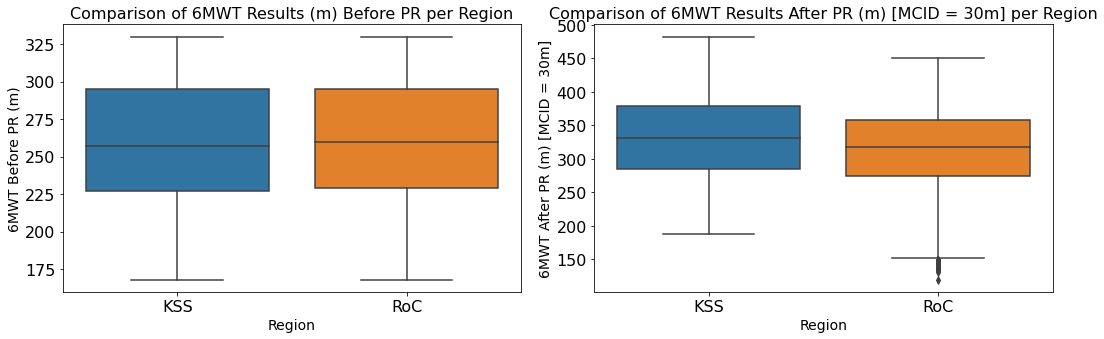

In [27]:
#Create distance walked before and after plots

fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(x='Region', y='6MWT Before PR (m)', data=merged_df,ax=axs[0])
axs[0].set_title('Comparison of 6MWT Results (m) Before PR per Region',fontsize=16)
axs[0].set_xlabel('Region',fontsize=14)
axs[0].set_ylabel('6MWT Before PR (m)',fontsize=14)

sns.boxplot(x='Region',y='6MWT After PR (m) [MCID = 30m]', data=merged_df,ax=axs[1])
axs[1].set_title('Comparison of 6MWT Results After PR (m) [MCID = 30m] per Region',fontsize=16)
axs[1].set_xlabel('Region',fontsize=14)
axs[1].set_ylabel('6MWT After PR (m) [MCID = 30m]',fontsize=14)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Age')

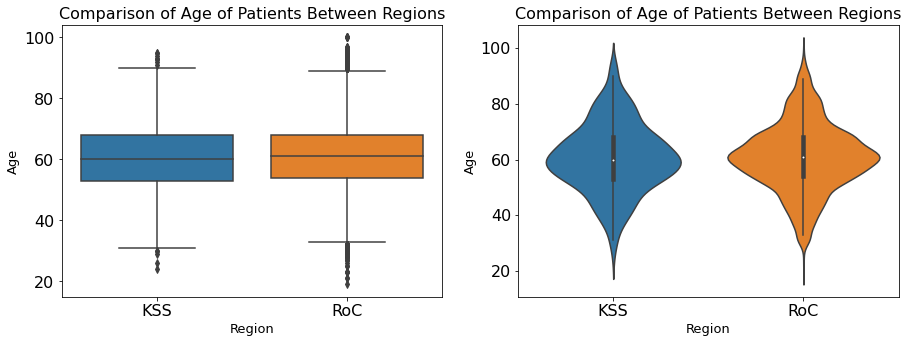

In [28]:
#Create age plots
fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(x='Region', y='Age at initial appointment', data=merged_df,ax=axs[0])
axs[0].set_title('Comparison of Age of Patients Between Regions',fontsize=16)
axs[0].set_xlabel('Region',fontsize=13)
axs[0].set_ylabel('Age',fontsize=13)

sns.violinplot(x='Region', y='Age at initial appointment', data=merged_df,ax=axs[1])
axs[1].set_title('Comparison of Age of Patients Between Regions',fontsize=16)
axs[1].set_xlabel('Region',fontsize=13)
axs[1].set_ylabel('Age',fontsize=13)

In [29]:
merged_df['Time Difference'] = merged_df['Completion date'] - merged_df['Enrolment date']
merged_df = merged_df.dropna(subset=['Time Difference']) #Create new column and drop NaN values
merged_df

,County,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,...,Practice 6MWT carried out?,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Region,Average number of staff,Staff sickness %,Time Difference
0,Surrey,51,Male,Yes,Yes,2018-08-31,2019-01-19,2019-02-02,2019-03-11,60.0,...,Yes,No,Yes,4,1.0,10,KSS,14,3.0,37 days
2,Surrey,64,Male,Yes,Yes,2018-11-26,2019-01-28,2019-02-04,2019-03-20,52.0,...,No,Yes,Yes,4,1.0,10,KSS,14,3.0,44 days
3,Surrey,185,Male,Yes,Yes,2018-04-03,2018-05-15,2018-05-30,2018-07-08,68.0,...,Yes,Yes,Yes,3,1.0,10,KSS,14,3.0,39 days
4,Surrey,188,Female,Yes,Yes,2018-08-02,2018-08-11,2018-08-27,2018-10-11,56.0,...,Yes,Yes,Yes,4,1.0,10,KSS,14,3.0,45 days
5,Surrey,195,Female,Yes,Yes,2018-10-16,2019-01-20,2019-02-09,2019-03-11,71.0,...,Yes,Yes,Yes,3,1.0,8,KSS,14,3.0,30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12044,Oxfordshire,11822,Female,Yes,Yes,2018-04-29,2018-07-10,2018-07-27,2018-09-09,57.0,...,No,Yes,Yes,3,2.0,5,RoC,2,3.0,44 days
12046,Oxfordshire,11887,Female,Yes,Yes,2018-07-25,2018-12-03,2018-12-16,2019-01-29,57.0,...,No,Yes,Yes,3,2.0,6,RoC,2,3.0,44 days
12047,Oxfordshire,11949,Female,Yes,Yes,2018-02-13,2019-09-12,2019-09-30,2019-11-09,78.0,...,Yes,Yes,Yes,5,5.0,2,RoC,2,3.0,40 days
12050,Oxfordshire,12009,Male,Yes,Yes,2018-11-11,2019-01-28,2019-02-10,2019-03-07,63.0,...,Yes,Yes,Yes,3,2.0,5,RoC,2,3.0,25 days


In [30]:
merged_df['Time Difference (Days)'] = merged_df['Time Difference'].dt.days #Creating new integer column to plot data
merged_df

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12196\1567505265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Time Difference (Days)'] = merged_df['Time Difference'].dt.days #Creating new integer column to plot data


,County,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,...,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Region,Average number of staff,Staff sickness %,Time Difference,Time Difference (Days)
0,Surrey,51,Male,Yes,Yes,2018-08-31,2019-01-19,2019-02-02,2019-03-11,60.0,...,No,Yes,4,1.0,10,KSS,14,3.0,37 days,37
2,Surrey,64,Male,Yes,Yes,2018-11-26,2019-01-28,2019-02-04,2019-03-20,52.0,...,Yes,Yes,4,1.0,10,KSS,14,3.0,44 days,44
3,Surrey,185,Male,Yes,Yes,2018-04-03,2018-05-15,2018-05-30,2018-07-08,68.0,...,Yes,Yes,3,1.0,10,KSS,14,3.0,39 days,39
4,Surrey,188,Female,Yes,Yes,2018-08-02,2018-08-11,2018-08-27,2018-10-11,56.0,...,Yes,Yes,4,1.0,10,KSS,14,3.0,45 days,45
5,Surrey,195,Female,Yes,Yes,2018-10-16,2019-01-20,2019-02-09,2019-03-11,71.0,...,Yes,Yes,3,1.0,8,KSS,14,3.0,30 days,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12044,Oxfordshire,11822,Female,Yes,Yes,2018-04-29,2018-07-10,2018-07-27,2018-09-09,57.0,...,Yes,Yes,3,2.0,5,RoC,2,3.0,44 days,44
12046,Oxfordshire,11887,Female,Yes,Yes,2018-07-25,2018-12-03,2018-12-16,2019-01-29,57.0,...,Yes,Yes,3,2.0,6,RoC,2,3.0,44 days,44
12047,Oxfordshire,11949,Female,Yes,Yes,2018-02-13,2019-09-12,2019-09-30,2019-11-09,78.0,...,Yes,Yes,5,5.0,2,RoC,2,3.0,40 days,40
12050,Oxfordshire,12009,Male,Yes,Yes,2018-11-11,2019-01-28,2019-02-10,2019-03-07,63.0,...,Yes,Yes,3,2.0,5,RoC,2,3.0,25 days,25


Text(0, 0.5, 'Days to Complete PR')

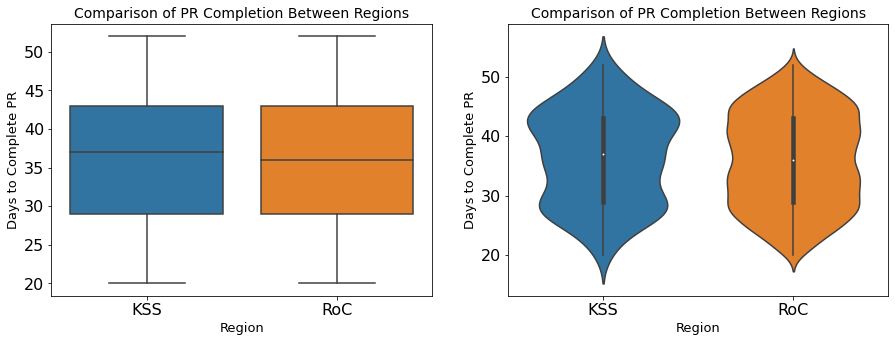

In [31]:
#Create comparison of time to complete the programme between regions plots

fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(x='Region', y='Time Difference (Days)', data=merged_df,ax=axs[0])
axs[0].set_title('Comparison of PR Completion Between Regions',fontsize=14)
axs[0].set_xlabel('Region',fontsize=13)
axs[0].set_ylabel('Days to Complete PR',fontsize=13)

sns.violinplot(x='Region', y='Time Difference (Days)', data=merged_df,ax=axs[1])
axs[1].set_title('Comparison of PR Completion Between Regions',fontsize=14)
axs[1].set_xlabel('Region',fontsize=13)
axs[1].set_ylabel('Days to Complete PR',fontsize=13)

Text(555.1704545454544, 0.5, 'Satisfaction Rating')

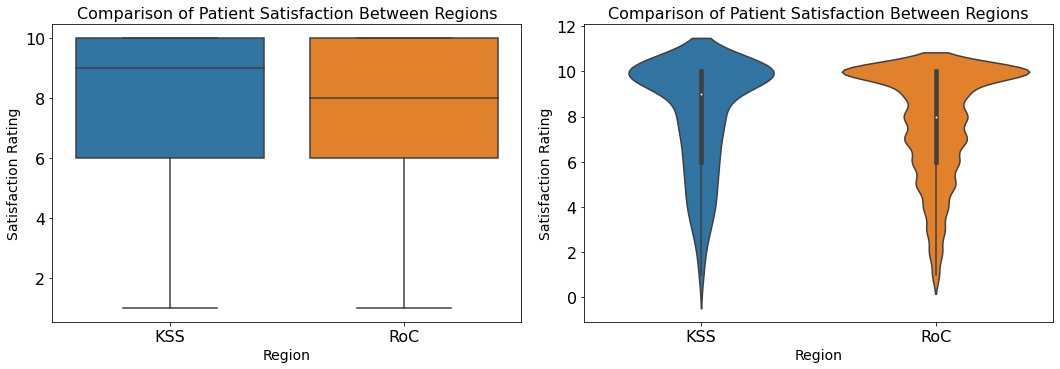

In [32]:
#Creating patient satisfaction plots
fig,axs = plt.subplots(1,2,figsize=(15,5))
plt.tight_layout()

sns.boxplot(x='Region', y='Patient satisfaction', data=merged_df,ax=axs[0])
axs[0].set_title('Comparison of Patient Satisfaction Between Regions',fontsize=16)
axs[0].set_xlabel('Region',fontsize=14)
axs[0].set_ylabel('Satisfaction Rating',fontsize=14)

sns.violinplot(x='Region', y='Patient satisfaction', data=merged_df,ax=axs[1])
axs[1].set_title('Comparison of Patient Satisfaction Between Regions',fontsize=16)
axs[1].set_xlabel('Region',fontsize=14)
axs[1].set_ylabel('Satisfaction Rating',fontsize=14)

Text(0, 0.5, 'Absenteeism (%)')

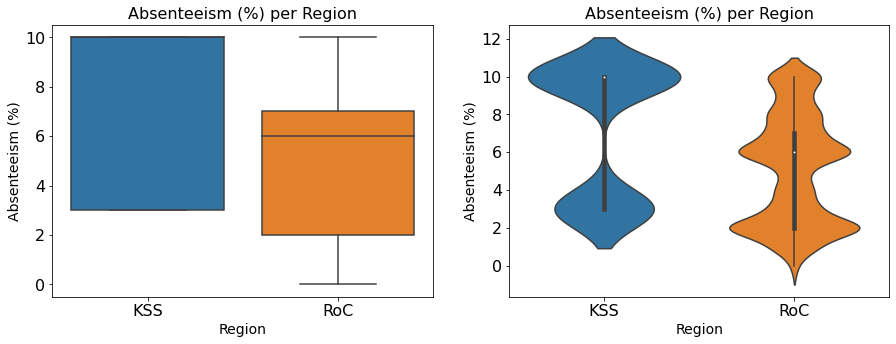

In [33]:
#Creating absenteeism plots
fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(x='Region', y='Staff sickness %', data=merged_df,ax=axs[0])
axs[0].set_title('Absenteeism (%) per Region',fontsize=16)
axs[0].set_xlabel('Region',fontsize=14)
axs[0].set_ylabel('Absenteeism (%)',fontsize=14)

sns.violinplot(x='Region', y='Staff sickness %', data=merged_df,ax=axs[1])
axs[1].set_title('Absenteeism (%) per Region',fontsize=16)
axs[1].set_xlabel('Region',fontsize=14)
axs[1].set_ylabel('Absenteeism (%)',fontsize=14)

In [34]:
#Creating KSS dataframe. 
KSS = merged_df.set_index('County')
KSS1 = KSS.loc[KSS.index.isin(['Kent', 'Surrey', 'Sussex'])]
KSS1

,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,6MWT Before PR (m),...,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Region,Average number of staff,Staff sickness %,Time Difference,Time Difference (Days)
County,,,,,,,,,,,,,,,,,,,,,
Surrey,51,Male,Yes,Yes,2018-08-31,2019-01-19,2019-02-02,2019-03-11,60.0,325.0,...,No,Yes,4,1.0,10,KSS,14,3.0,37 days,37
Surrey,64,Male,Yes,Yes,2018-11-26,2019-01-28,2019-02-04,2019-03-20,52.0,221.0,...,Yes,Yes,4,1.0,10,KSS,14,3.0,44 days,44
Surrey,185,Male,Yes,Yes,2018-04-03,2018-05-15,2018-05-30,2018-07-08,68.0,278.0,...,Yes,Yes,3,1.0,10,KSS,14,3.0,39 days,39
Surrey,188,Female,Yes,Yes,2018-08-02,2018-08-11,2018-08-27,2018-10-11,56.0,199.0,...,Yes,Yes,4,1.0,10,KSS,14,3.0,45 days,45
Surrey,195,Female,Yes,Yes,2018-10-16,2019-01-20,2019-02-09,2019-03-11,71.0,242.0,...,Yes,Yes,3,1.0,8,KSS,14,3.0,30 days,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kent,12142,Male,Yes,Yes,2018-09-05,2019-01-18,2019-02-04,2019-03-25,80.0,295.0,...,Yes,Yes,4,2.0,9,KSS,8,10.0,49 days,49
Kent,12257,Female,Yes,Yes,2018-08-12,2018-08-31,2018-09-12,2018-10-24,73.0,270.0,...,Yes,Yes,3,3.0,8,KSS,8,10.0,42 days,42
Kent,12270,Male,Yes,Yes,2018-01-12,2019-01-14,2019-01-31,2019-02-28,57.0,255.0,...,No,Yes,4,3.0,6,KSS,8,10.0,28 days,28


In [35]:
#creating RoC dataframe.
RoC2 = merged_df.set_index('County')
RoC3 = RoC2.loc[~RoC2.index.isin(['Kent','Surrey','Sussex'])] #Selecting each row except KSS
RoC3

,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,6MWT Before PR (m),...,Practice ISWT carried out?,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Region,Average number of staff,Staff sickness %,Time Difference,Time Difference (Days)
County,,,,,,,,,,,,,,,,,,,,,
Greater Manchester,10,Male,Yes,Yes,2018-05-31,2019-05-05,2019-05-16,2019-06-18,53.0,234.0,...,No,Yes,3,2.0,6,RoC,6,2.0,33 days,33
Greater Manchester,43,Male,Yes,Yes,2018-07-24,2018-09-12,2018-09-24,2018-10-26,73.0,307.0,...,No,Yes,3,1.0,10,RoC,6,2.0,32 days,32
Greater Manchester,45,Male,Yes,Yes,2018-07-12,2018-10-03,2018-10-19,2018-11-25,64.0,202.0,...,Yes,Yes,4,4.0,3,RoC,6,2.0,37 days,37
Greater Manchester,79,Male,Yes,Yes,2018-03-30,2018-06-19,2018-07-03,2018-07-30,62.0,223.0,...,Yes,Yes,4,1.0,10,RoC,6,2.0,27 days,27
Greater Manchester,101,Male,Yes,Yes,2018-02-11,2018-06-19,2018-07-05,2018-08-10,48.0,236.0,...,Yes,Yes,3,2.0,5,RoC,6,2.0,36 days,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Oxfordshire,11822,Female,Yes,Yes,2018-04-29,2018-07-10,2018-07-27,2018-09-09,57.0,311.0,...,Yes,Yes,3,2.0,5,RoC,2,3.0,44 days,44
Oxfordshire,11887,Female,Yes,Yes,2018-07-25,2018-12-03,2018-12-16,2019-01-29,57.0,285.0,...,Yes,Yes,3,2.0,6,RoC,2,3.0,44 days,44
Oxfordshire,11949,Female,Yes,Yes,2018-02-13,2019-09-12,2019-09-30,2019-11-09,78.0,190.0,...,Yes,Yes,5,5.0,2,RoC,2,3.0,40 days,40


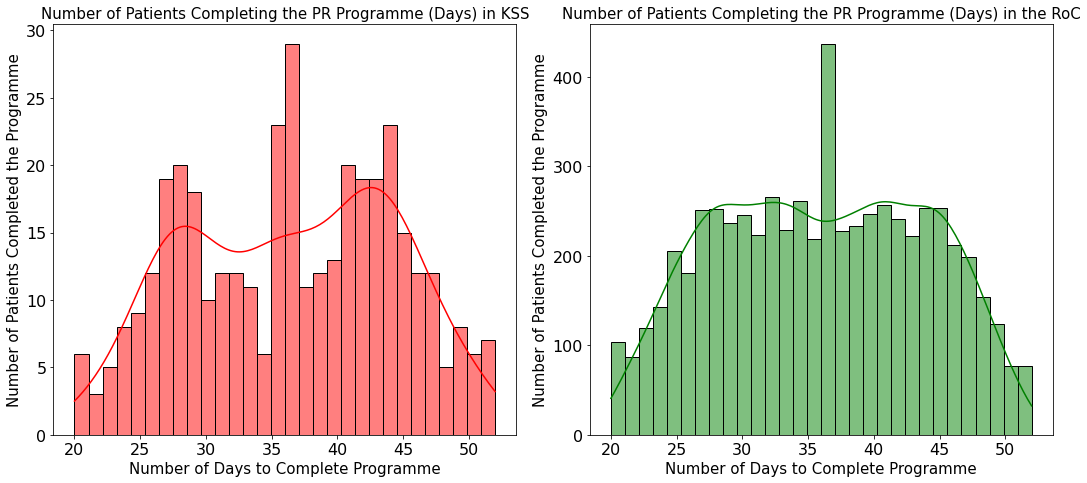

In [36]:
#Create histograms
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.tight_layout()

sns.histplot(KSS1['Time Difference (Days)'], kde=True, bins=30, ax=axs[0],color ='Red')
axs[0].set_title('Number of Patients Completing the PR Programme (Days) in KSS',fontsize=15)
axs[0].set_xlabel('Number of Days to Complete Programme', fontsize=15)
axs[0].set_ylabel('Number of Patients Completed the Programme',fontsize=15)

sns.histplot(RoC3['Time Difference (Days)'], kde=True, bins=30, ax=axs[1],color='Green')
axs[1].set_title('Number of Patients Completing the PR Programme (Days) in the RoC',fontsize=15)
axs[1].set_xlabel('Number of Days to Complete Programme', fontsize=15)
axs[1].set_ylabel('Number of Patients Completed the Programme', fontsize=15)

plt.tight_layout()
plt.show()

# How do outcomes such as the 6 Minute Walk Test and Incremental Shuttle Walk Test vary between patients / regions? 

In [37]:
MWTISW = df1[['Patient identifier','County','6MWT Before PR (m)','6MWT After PR (m) [MCID = 30m]','ISWT Before PR (m)',
    'ISWT After PR (m) [MCID = 48m]','Practice 6MWT carried out?','Practice ISWT carried out?']]
MWTISW.set_index('County') #Select relevant columns then set index to County

,Patient identifier,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?
County,,,,,,,
Greater Manchester,1,NaN,NaN,NaN,NaN,NaN,NaN
Hampshire,2,NaN,NaN,NaN,NaN,NaN,NaN
West Yorkshire,3,255.0,311.300000,163.0,162.600000,Yes,Yes
Greater Manchester,4,NaN,NaN,NaN,NaN,NaN,NaN
Bedfordshire,5,313.0,338.000000,247.0,208.000000,No,Yes
...,...,...,...,...,...,...,...
Lancashire,12424,NaN,NaN,NaN,NaN,NaN,NaN
Devon,12425,234.0,NaN,208.0,NaN,NaN,NaN
Norfolk,12426,211.0,297.125000,163.0,256.250000,Yes,Yes


In [38]:
#compare patients
MWTISW.dropna() #over 5600 rows with NaN values
MWTISW.set_index('Patient identifier')

,County,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?
Patient identifier,,,,,,,
1,Greater Manchester,NaN,NaN,NaN,NaN,NaN,NaN
2,Hampshire,NaN,NaN,NaN,NaN,NaN,NaN
3,West Yorkshire,255.0,311.300000,163.0,162.600000,Yes,Yes
4,Greater Manchester,NaN,NaN,NaN,NaN,NaN,NaN
5,Bedfordshire,313.0,338.000000,247.0,208.000000,No,Yes
...,...,...,...,...,...,...,...
12424,Lancashire,NaN,NaN,NaN,NaN,NaN,NaN
12425,Devon,234.0,NaN,208.0,NaN,NaN,NaN
12426,Norfolk,211.0,297.125000,163.0,256.250000,Yes,Yes


In [39]:
MWTISW.dropna() #Drop NaN values

,Patient identifier,County,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?
2,3,West Yorkshire,255.0,311.300000,163.0,162.600000,Yes,Yes
4,5,Bedfordshire,313.0,338.000000,247.0,208.000000,No,Yes
6,7,Leicestershire,254.0,345.571429,262.0,199.142857,No,Yes
7,8,West Yorkshire,307.0,342.300000,221.0,273.600000,Yes,Yes
9,10,Greater Manchester,234.0,274.333333,249.0,95.666667,No,No
...,...,...,...,...,...,...,...,...
12416,12417,Greater London,191.0,274.851852,231.0,205.703704,No,No
12419,12420,Somerset,286.0,282.250000,219.0,164.500000,No,Yes
12422,12423,North Yorkshire,194.0,275.333333,226.0,224.666667,Yes,Yes
12425,12426,Norfolk,211.0,297.125000,163.0,256.250000,Yes,Yes


In [40]:
#Creating new dataframes for plots below

before = MWTISW['6MWT Before PR (m)']
after = MWTISW['6MWT After PR (m) [MCID = 30m]']

before = before.dropna()
after=after.dropna()

before1 = MWTISW['ISWT Before PR (m)'] 
after1 = MWTISW['ISWT After PR (m) [MCID = 48m]']

before1 = before1.dropna()
after1 = after1.dropna()

Text(0, 0.5, '6MWT Distance (m)')

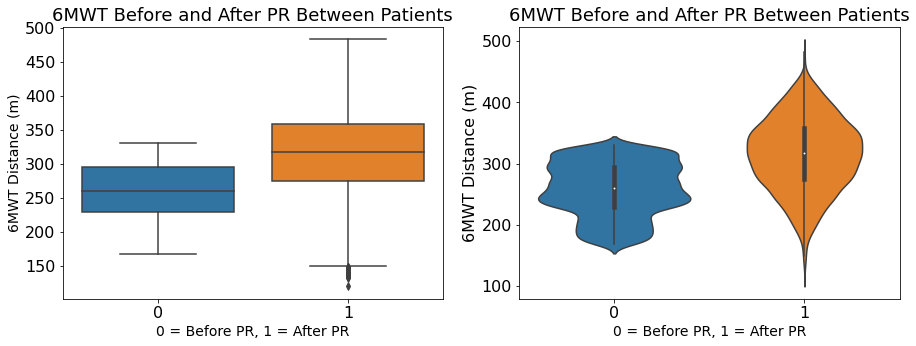

In [41]:
#Creating plots to compare patients walking distance before and after PR.

fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data=[before,after],ax=axs[0])
axs[0].set_title('6MWT Before and After PR Between Patients',fontsize=18)
axs[0].set_xlabel('0 = Before PR, 1 = After PR',fontsize=14)
axs[0].set_ylabel('6MWT Distance (m)',fontsize=14)

sns.violinplot(data=[before,after],ax=axs[1])
axs[1].set_title('6MWT Before and After PR Between Patients',fontsize=18)
axs[1].set_xlabel('0 = Before PR, 1 = After PR',fontsize=14)
axs[1].set_ylabel('6MWT Distance (m)')

Text(0, 0.5, 'ISWT Distance (m)')

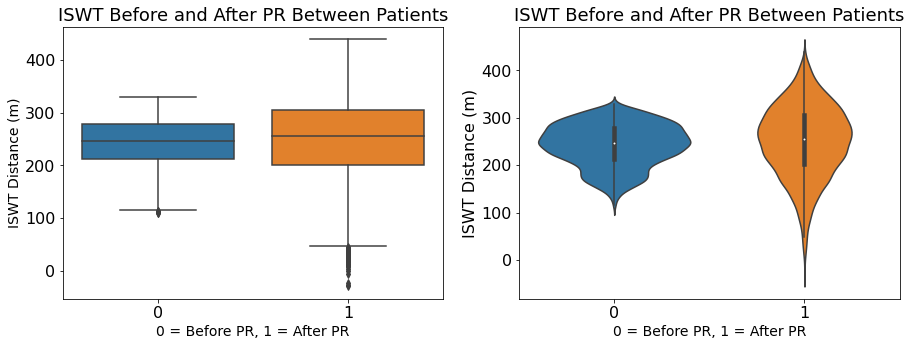

In [42]:
#Create plots to compare ISWT results before and after PR programme

fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data=[before1,after1],ax=axs[0])
axs[0].set_title('ISWT Before and After PR Between Patients',fontsize=18)
axs[0].set_xlabel('0 = Before PR, 1 = After PR',fontsize=14)
axs[0].set_ylabel('ISWT Distance (m)',fontsize=14)

sns.violinplot(data=[before1,after1],ax=axs[1])
axs[1].set_title('ISWT Before and After PR Between Patients',fontsize=18)
axs[1].set_xlabel('0 = Before PR, 1 = After PR',fontsize=14)
axs[1].set_ylabel('ISWT Distance (m)')

In [43]:
#Removing outlier Jeffrey Smith Sr as he is a patient not a county.
MWTISW = MWTISW[MWTISW.County != 'Jeffrey Smith Sr.']
#Remove 'County Durham \x0and'
MWTISW['County'] = MWTISW['County'].replace('County Durham\xa0and', 'County Durham') #Replacing /xa0and with County Durham
MWTISW[MWTISW['County'] == 'County Durham']

,Patient identifier,County,6MWT Before PR (m),6MWT After PR (m) [MCID = 30m],ISWT Before PR (m),ISWT After PR (m) [MCID = 48m],Practice 6MWT carried out?,Practice ISWT carried out?
141,142,County Durham,203.0,287.0,286.0,385.0,Yes,Yes
143,144,County Durham,NaN,NaN,NaN,NaN,NaN,NaN
166,167,County Durham,NaN,NaN,NaN,NaN,NaN,NaN
220,221,County Durham,NaN,NaN,NaN,NaN,NaN,NaN
394,395,County Durham,272.0,275.0,221.0,251.0,No,Yes
...,...,...,...,...,...,...,...,...
12137,12138,County Durham,173.0,245.0,191.0,202.0,Yes,Yes
12365,12366,County Durham,315.0,419.0,245.0,240.0,Yes,No
12368,12369,County Durham,316.0,358.0,317.0,422.0,Yes,Yes
12382,12383,County Durham,297.0,324.0,249.0,283.0,No,No


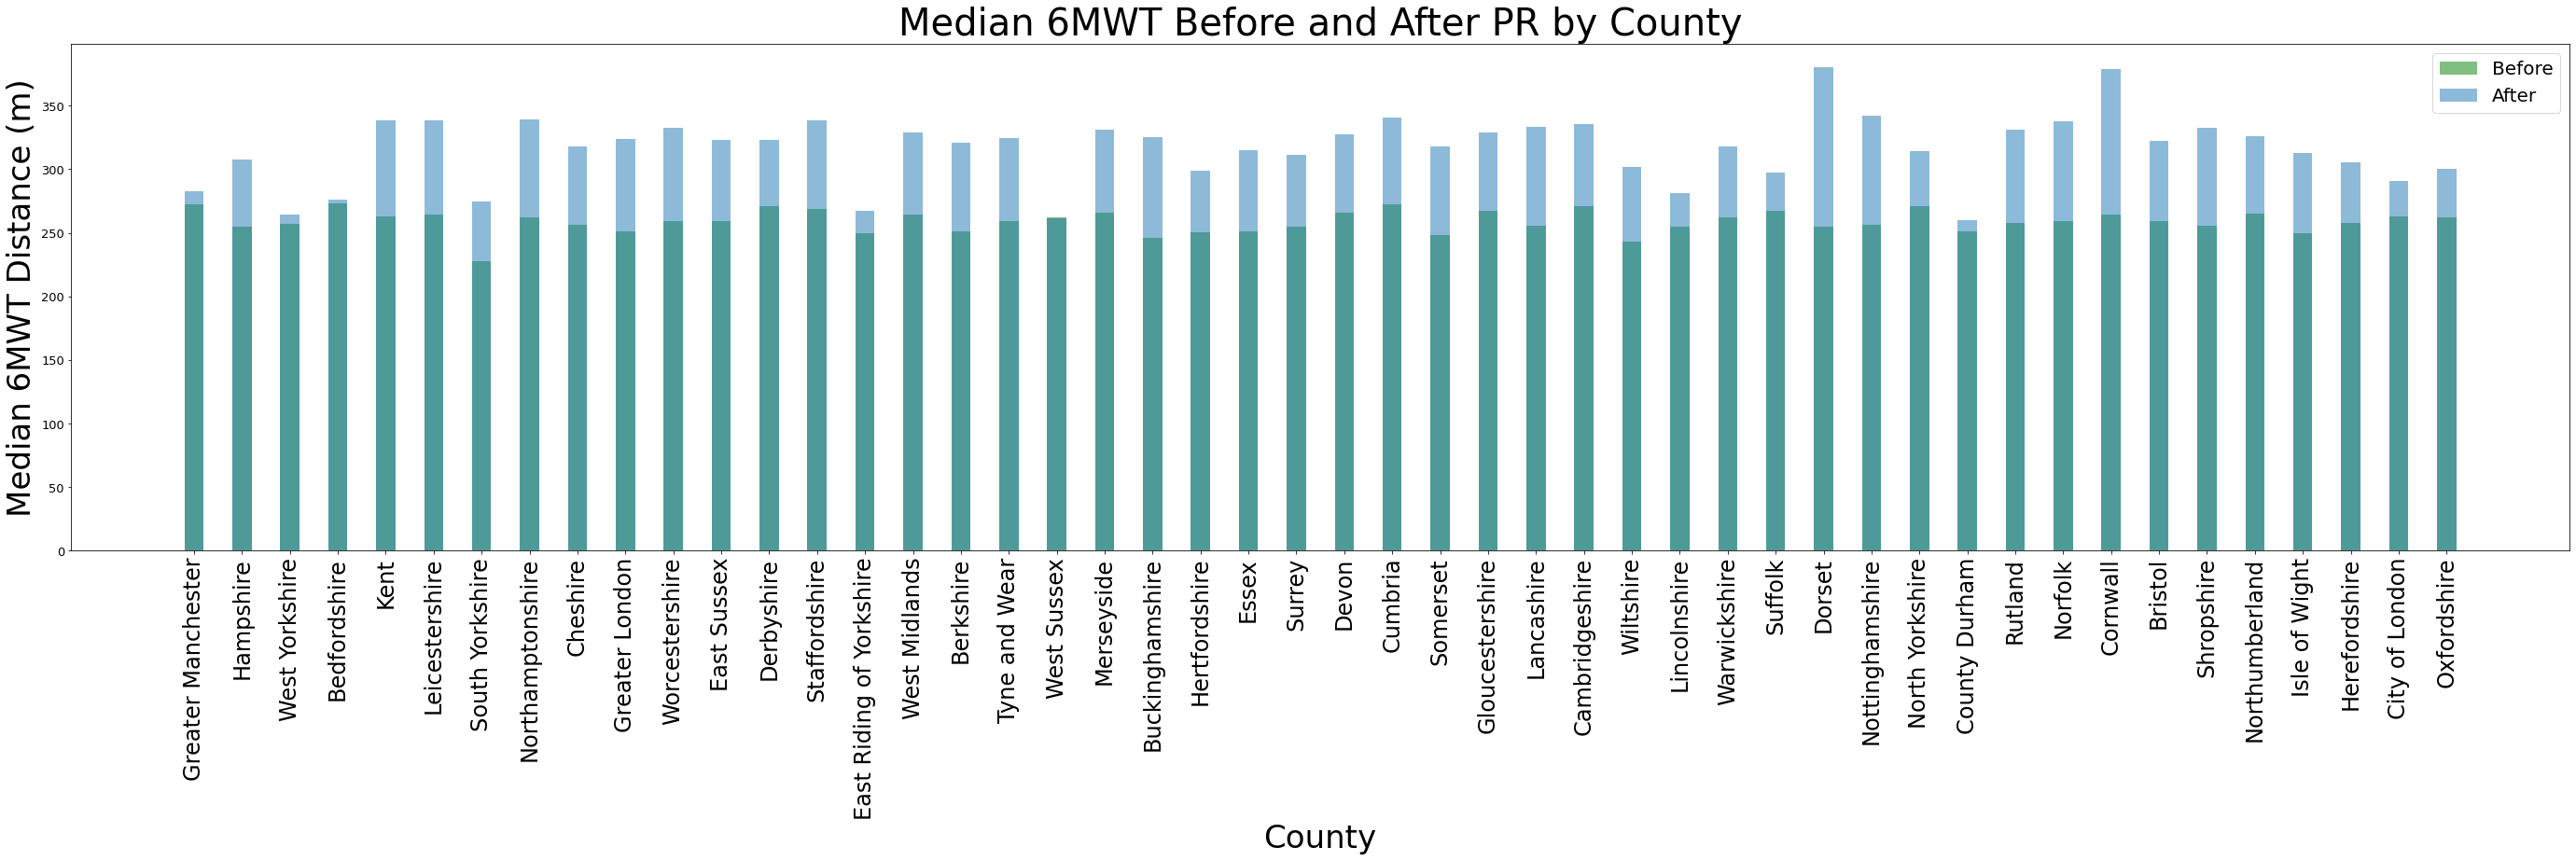

In [44]:
plt.figure(figsize=(48,10))
plt.rcParams.update({'font.size': 13})
plt.tight_layout()

County = MWTISW['County']
Counties = MWTISW.groupby('County')

# Create x-axis
x = range(len(Counties))

# Create bar chart of counties
plt.bar(x, Counties['6MWT Before PR (m)'].median(), width=0.4, alpha = 0.5,label='Before',color='Green')
plt.bar(x, Counties['6MWT After PR (m) [MCID = 30m]'].median(), width=0.4, alpha=0.5,label='After')

# Create labels for each county
plt.xticks(x, County.unique(),rotation=90, fontsize=24)

plt.xlabel('County',fontsize=34)
plt.ylabel('Median 6MWT Distance (m)',fontsize=34)
plt.title('Median 6MWT Before and After PR by County',fontsize=40)

plt.legend(fontsize=20)
plt.show()


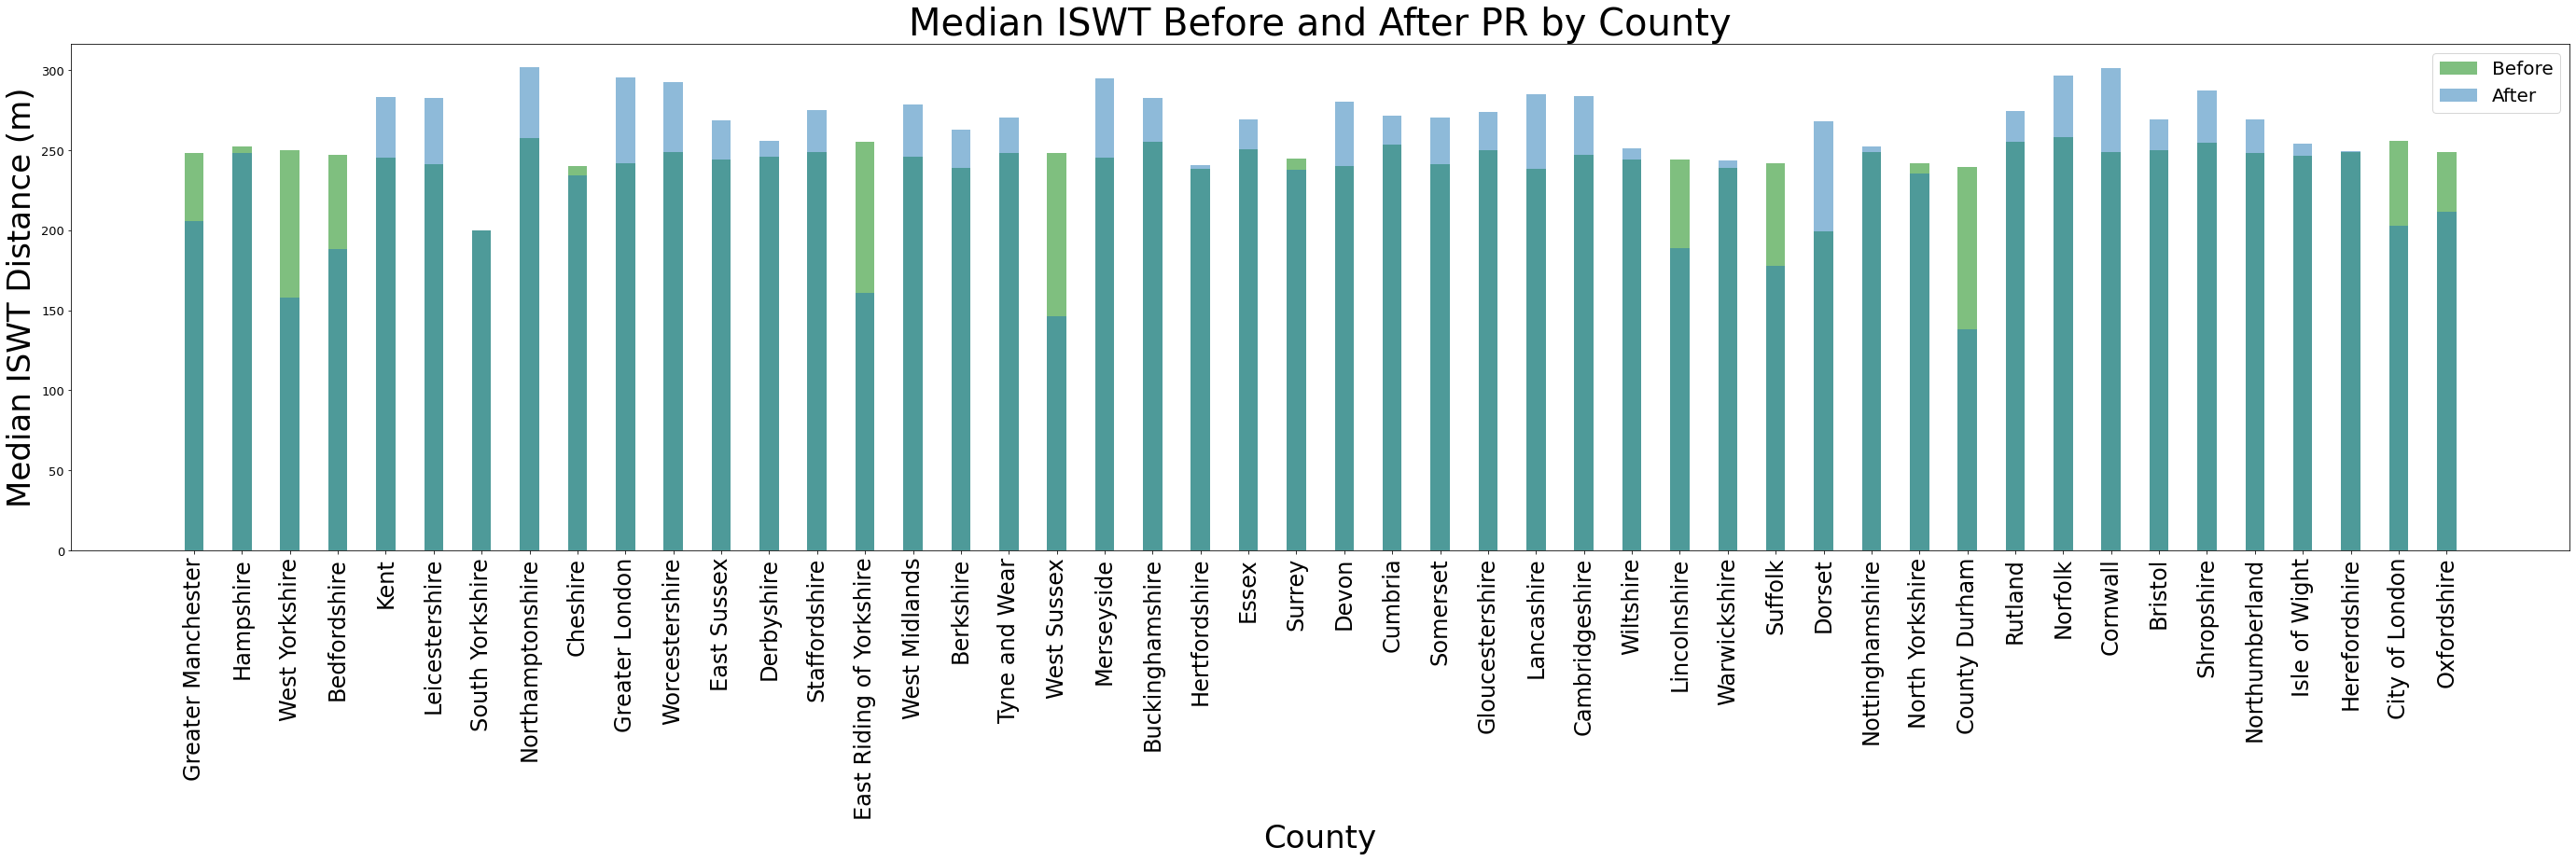

In [45]:
MWTISW
plt.figure(figsize=(48,10))
plt.rcParams.update({'font.size': 13})
plt.tight_layout()

County = MWTISW['County']
Counties = MWTISW.groupby('County')

# create x-axis
x = range(len(Counties))

# Create bar chart of counties
plt.bar(x, Counties['ISWT Before PR (m)'].median(), width=0.4, alpha = 0.5,label='Before',color='Green')
plt.bar(x, Counties['ISWT After PR (m) [MCID = 48m]'].median(), width=0.4, alpha=0.5,label='After')

#Create labels for each county
plt.xticks(x, County.unique(),rotation=90,fontsize=24)

# add labels and title
plt.xlabel('County',fontsize=34)
plt.ylabel('Median ISWT Distance (m)',fontsize=34)
plt.title('Median ISWT Before and After PR by County',fontsize=40)

plt.legend(fontsize=20)
plt.show()

#Much higher variability in results using ISWT method. How far do patients walk in ISWT? For how long? How intense? 
#Unlike 6MWT we see some patients perform worse after ISWT.

# How do outcomes such as the 6 Minute Walk Test vary between patients who practiced compared with no practice?

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12196\3927145255.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  axs[0].plot(x_values_6MWT_p, slope_6MWT_p*x_values_6MWT_p+intercept_6MWT_p, '-b',lw=3, ls = 'dashed',label='Regression Line')
C:\Users\Andrew\AppData\Local\Temp\ipykernel_12196\3927145255.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-k" (-> linestyle='-'). The keyword argument will take precedence.
  axs[1].plot(x_values_6MWT_np, slope_6MWT_np*x_values_6MWT_np+intercept_6MWT_np, '-k', lw=3, ls = 'dashed',label='Regression Line')


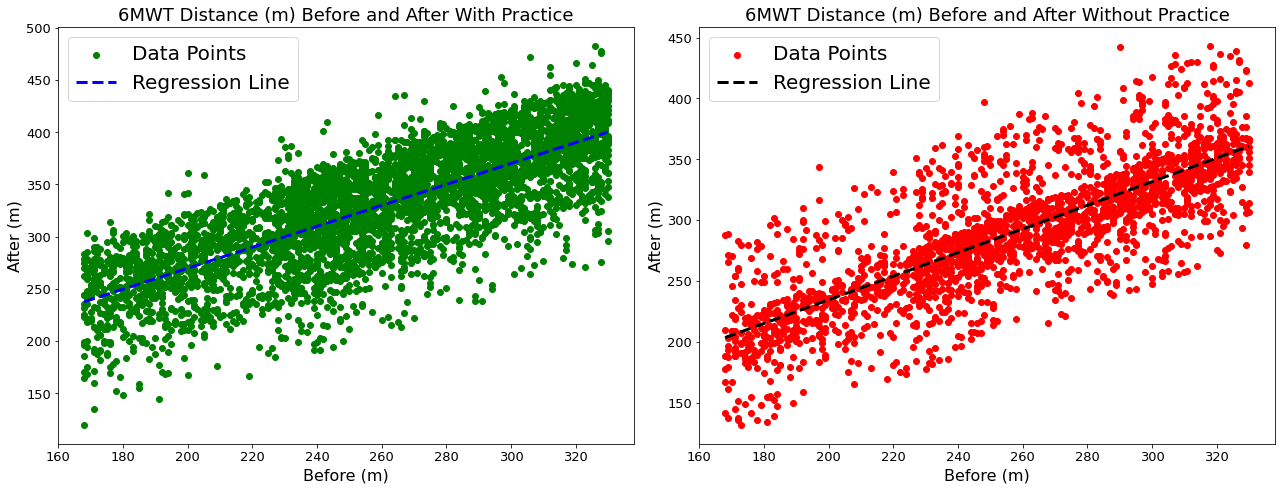

In [46]:
#Did practice assist in achieving a better 6MWT score?
yes_practice = merged_df[merged_df['Practice 6MWT carried out?'] == 'Yes'] #The patient practiced 6MWT
no_practice = merged_df[merged_df['Practice 6MWT carried out?'] == 'No'] #The patient did not practice their 6MWT

#Using linregress library comparing distance walked before and after generating summary statistics
slope_6MWT_p, intercept_6MWT_p, r_value_6MWT_p, p_value_6MWT_p, std_err_6MWT_p = linregress(yes_practice['6MWT Before PR (m)'],
                                                                yes_practice['6MWT After PR (m) [MCID = 30m]'])
slope_6MWT_np, intercept_6MWT_np, r_value_6MWT_np, p_value_6MWT_np, std_err_6MWT_np = linregress(no_practice['6MWT Before PR (m)'],
                                                                no_practice['6MWT After PR (m) [MCID = 30m]'])
#Creating regression line
x_values_6MWT_p = np.linspace(yes_practice['6MWT Before PR (m)'].min(), yes_practice['6MWT Before PR (m)'].max(), len(no_practice))
x_values_6MWT_np = np.linspace(no_practice['6MWT Before PR (m)'].min(), no_practice['6MWT Before PR (m)'].max(), len(yes_practice))

fig, axs = plt.subplots(1, 2, figsize=(18,7))

# create scatter plot &regression line for 6MWT test
axs[0].scatter(yes_practice['6MWT Before PR (m)'], yes_practice['6MWT After PR (m) [MCID = 30m]'], color='green',label='Data Points')
axs[0].plot(x_values_6MWT_p, slope_6MWT_p*x_values_6MWT_p+intercept_6MWT_p, '-b',lw=3, ls = 'dashed',label='Regression Line')
axs[0].legend(bbox_to_anchor=(0,1),loc='upper left',ncol=1,fontsize=20)
axs[0].set_title('6MWT Distance (m) Before and After With Practice',fontsize=18)
axs[0].set_xlabel('Before (m)',fontsize=16)
axs[0].set_ylabel('After (m)',fontsize=16)

# create scatter plot & regression line for ISWT test
axs[1].scatter(x=no_practice['6MWT Before PR (m)'], y=no_practice['6MWT After PR (m) [MCID = 30m]'],label='Data Points',c='red')
axs[1].plot(x_values_6MWT_np, slope_6MWT_np*x_values_6MWT_np+intercept_6MWT_np, '-k', lw=3, ls = 'dashed',label='Regression Line')
axs[1].legend(bbox_to_anchor=(0,1),loc='upper left',ncol=1,fontsize=20)
axs[1].set_title('6MWT Distance (m) Before and After Without Practice',fontsize=18)
axs[1].set_xlabel('Before (m)',fontsize=16)
axs[1].set_ylabel('After (m)',fontsize=16)

plt.tight_layout()
plt.show()

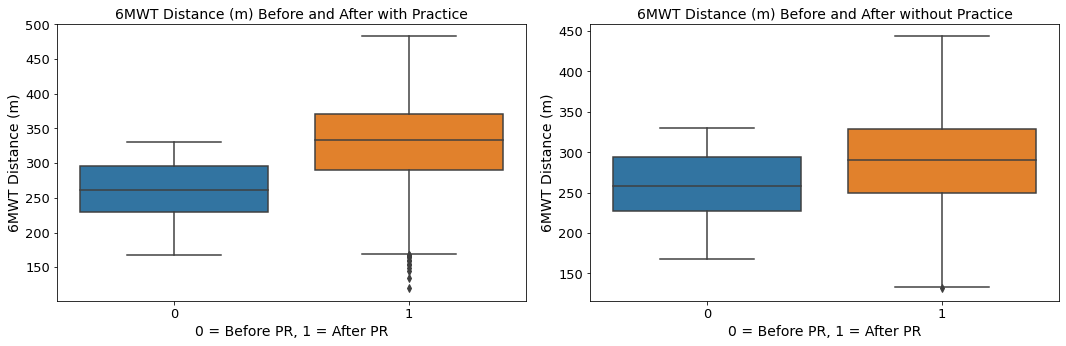

In [47]:
#Create new variables to plot the data on a boxplot for further statistical quantification
practice_before = yes_practice['6MWT Before PR (m)']
no_practice_before = no_practice['6MWT Before PR (m)']
practice_after = yes_practice['6MWT After PR (m) [MCID = 30m]']
no_practice_after = no_practice['6MWT After PR (m) [MCID = 30m]']

fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data=[practice_before,practice_after],ax=axs[0])
axs[0].set_title('6MWT Distance (m) Before and After with Practice',fontsize=14)
axs[0].set_xlabel('0 = Before PR, 1 = After PR',fontsize=14)
axs[0].set_ylabel('6MWT Distance (m)',fontsize=14)

sns.boxplot(data=[no_practice_before,no_practice_after],ax=axs[1])
axs[1].set_title('6MWT Distance (m) Before and After without Practice',fontsize=14)
axs[1].set_xlabel('0 = Before PR, 1 = After PR',fontsize=14)
axs[1].set_ylabel('6MWT Distance (m)',fontsize=14)

plt.tight_layout()
plt.show()

In [48]:
#Printing Statistics between practice & no practice groups
corr_practice = yes_practice['6MWT Before PR (m)'].corr(yes_practice['6MWT After PR (m) [MCID = 30m]'])
corr_no_practice = no_practice['6MWT Before PR (m)'].corr(no_practice['6MWT After PR (m) [MCID = 30m]'])
print ('correlation with practice =',corr_practice)
print ('correlation without practice =',corr_no_practice)
mean_practice = yes_practice['6MWT After PR (m) [MCID = 30m]'].mean()
mean_nopractice = no_practice['6MWT After PR (m) [MCID = 30m]'].mean()
print ('mean with practice =', mean_practice)
print ('mean without practice =', mean_nopractice)
sdev_practice = yes_practice['6MWT After PR (m) [MCID = 30m]'].std()
sdev_nopractice = no_practice['6MWT After PR (m) [MCID = 30m]'].std()
print ('standard deviation with practice =', sdev_practice)
print ('standard deviation without practice =', sdev_nopractice)
print('y-intercept with practice =',intercept_6MWT_p)
print('y-intercept without practice =', intercept_6MWT_np)
median_practice = yes_practice['6MWT After PR (m) [MCID = 30m]'].median()
median_nopractice = no_practice['6MWT After PR (m) [MCID = 30m]'].median()
print('median with practice =',median_practice)
print('median without practice =', median_nopractice)

correlation with practice = 0.777204118297374
correlation without practice = 0.7861755919199461
mean with practice = 329.17257938986137
mean without practice = 289.3227827761613
standard deviation with practice = 56.5584226284329
standard deviation without practice = 54.818264578280846
y-intercept with practice = 68.9914615604306
y-intercept without practice = 40.21613009964835
median with practice = 332.75
median without practice = 290.625


# Are there any patients here that would not usually be considered suitable for pulmonary rehabilitation? 

In [49]:
#We would need to know patients clinical history to see why the patient was referred. We cannot view under Caldicott Framework. 
#According to PR clinical service guidelines, we need to know patient referral history. Without this info I can't say why
# patient was referred.
#I can check if a patient was not referred but were assessed to weed out any mis-assessments

Referred = merged_df['Referred']
Assessed = merged_df['Assessed']

merged_df['Not Referred but Assessed'] = ((Referred == False) & (Assessed == True))
merged_df.loc[merged_df['Not Referred but Assessed'] == True] #No patients were wrongly assessed

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12196\1637881871.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Not Referred but Assessed'] = ((Referred == False) & (Assessed == True))


,County,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,...,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Region,Average number of staff,Staff sickness %,Time Difference,Time Difference (Days),Not Referred but Assessed


In [50]:
merged_df[merged_df['MRC Before PR'] <3] #All patients MRC before PR are 3 or above, as indictaed by the service guidelines

,County,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age at initial appointment,...,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Region,Average number of staff,Staff sickness %,Time Difference,Time Difference (Days),Not Referred but Assessed


# Does one or other of the walking tests appear more useful in analysing trends?

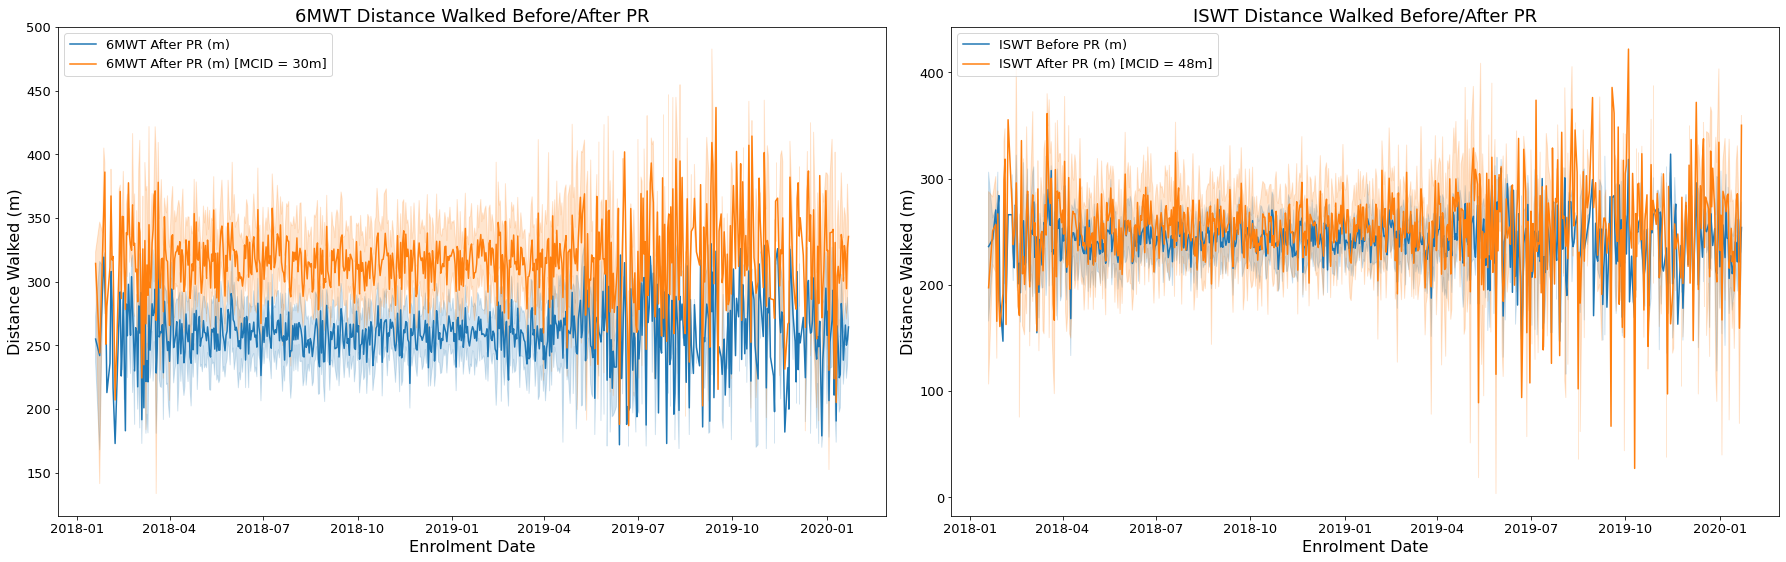

In [103]:
#Two plots showing trend over time. Comparison between 6MWT and ISWT.

fig, axs = plt.subplots(1, 2, figsize=(25,8))
sns.lineplot(x='Enrolment date', y='6MWT Before PR (m)', data=merged_df,ax=axs[0],label='6MWT After PR (m)')
sns.lineplot(x='Enrolment date', y='6MWT After PR (m) [MCID = 30m]', data=merged_df,ax=axs[0],
             label='6MWT After PR (m) [MCID = 30m]')
axs[0].set_title('6MWT Distance Walked Before/After PR',fontsize=18)
axs[0].set_xlabel('Enrolment Date',fontsize=16)
axs[0].set_ylabel('Distance Walked (m)',fontsize=16)
axs[0].legend(bbox_to_anchor=(0,1),loc='upper left',ncol=1)


sns.lineplot(x='Enrolment date', y='ISWT Before PR (m)', data=merged_df,ax=axs[1],label='ISWT Before PR (m)')
sns.lineplot(x='Enrolment date', y='ISWT After PR (m) [MCID = 48m]', data=merged_df,ax=axs[1],
             label='ISWT After PR (m) [MCID = 48m]')
axs[1].set_title('ISWT Distance Walked Before/After PR',fontsize=18)
axs[1].set_xlabel('Enrolment Date',fontsize=16)
axs[1].set_ylabel('Distance Walked (m)',fontsize=16)
axs[1].legend(bbox_to_anchor=(0,1),loc='upper left',ncol=1)


plt.tight_layout()
plt.show()

6MWT appears more useful. This is corroborated by box pots/linear regression below.

In [52]:
merged_df.isna().sum() #Checking how many na rows exist
merged_df = merged_df.dropna() #Removing NaN values to plot Linear Regression

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12196\984765249.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-r" (-> linestyle='-'). The keyword argument will take precedence.
  axs[0].plot(x_values_6MWT, slope_6MWT*x_values_6MWT+intercept_6MWT, '-r',lw=3, ls = 'dashed',label='Regression Line')
C:\Users\Andrew\AppData\Local\Temp\ipykernel_12196\984765249.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  axs[1].plot(x_values_ISWT, slope_ISWT*x_values_ISWT+intercept_ISWT, '-b', lw=3, ls = 'dashed',label='Regression Line')


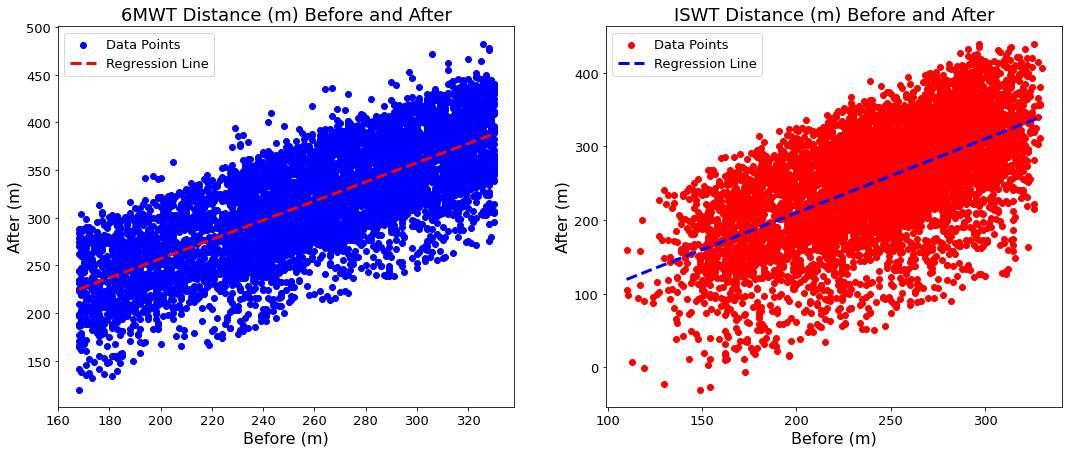

In [53]:
from scipy.stats import linregress

slope_6MWT, intercept_6MWT, r_value_6MWT, p_value_6MWT, std_err_6MWT = linregress(merged_df['6MWT Before PR (m)'], merged_df['6MWT After PR (m) [MCID = 30m]'])
slope_ISWT, intercept_ISWT, r_value_ISWT, p_value_ISWT, std_err_ISWT = linregress(merged_df['ISWT Before PR (m)'], merged_df['ISWT After PR (m) [MCID = 48m]'])
x_values_6MWT = np.linspace(merged_df['6MWT Before PR (m)'].min(), merged_df['6MWT Before PR (m)'].max(), len(merged_df))
x_values_ISWT = np.linspace(merged_df['ISWT Before PR (m)'].min(), merged_df['ISWT Before PR (m)'].max(), len(merged_df))

fig, axs = plt.subplots(1, 2, figsize=(18,7))

# create scatter plot &regression line for 6MWT test
axs[0].scatter(merged_df['6MWT Before PR (m)'], merged_df['6MWT After PR (m) [MCID = 30m]'], color='blue',label='Data Points')
axs[0].plot(x_values_6MWT, slope_6MWT*x_values_6MWT+intercept_6MWT, '-r',lw=3, ls = 'dashed',label='Regression Line')
axs[0].legend(bbox_to_anchor=(0,1),loc='upper left',ncol=1)
axs[0].set_title('6MWT Distance (m) Before and After',fontsize=18)
axs[0].set_xlabel('Before (m)',fontsize=16)
axs[0].set_ylabel('After (m)',fontsize=16)

# create scatter plot & regression line for ISWT test
axs[1].scatter(x=merged_df['ISWT Before PR (m)'], y=merged_df['ISWT After PR (m) [MCID = 48m]'],label='Data Points',c='red')
axs[1].plot(x_values_ISWT, slope_ISWT*x_values_ISWT+intercept_ISWT, '-b', lw=3, ls = 'dashed',label='Regression Line')
axs[1].legend(bbox_to_anchor=(0,1),loc='upper left',ncol=1)
axs[1].set_title('ISWT Distance (m) Before and After',fontsize=18)
axs[1].set_xlabel('Before (m)',fontsize=16)
axs[1].set_ylabel('After (m)',fontsize=16)

plt.show()

In [54]:
#Creating variables for plots below.
data1 = merged_df['6MWT Before PR (m)']
data2 = merged_df['6MWT After PR (m) [MCID = 30m]']
data3 = merged_df['ISWT Before PR (m)']
data4 = merged_df['ISWT After PR (m) [MCID = 48m]']

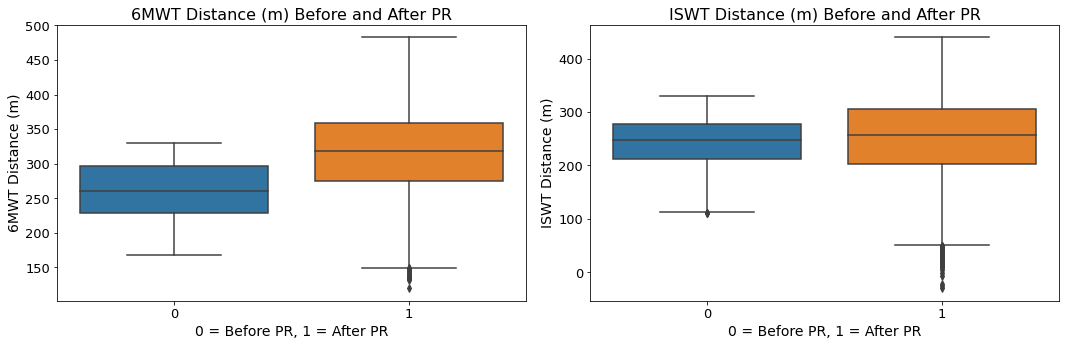

In [55]:
#Create 6MWT and ISWT plots

fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data=[data1,data2],ax=axs[0])
axs[0].set_title('6MWT Distance (m) Before and After PR',fontsize=16)
axs[0].set_xlabel('0 = Before PR, 1 = After PR',fontsize=14)
axs[0].set_ylabel('6MWT Distance (m)',fontsize=14)

sns.boxplot(data=[data3,data4],ax=axs[1])
axs[1].set_title('ISWT Distance (m) Before and After PR',fontsize=16)
axs[1].set_xlabel('0 = Before PR, 1 = After PR',fontsize=14)
axs[1].set_ylabel('ISWT Distance (m)',fontsize=14)

plt.tight_layout()
plt.show()

In [56]:
# calculate the correlation coefficient between 6MWT before and after
corr_6MWT = merged_df['6MWT Before PR (m)'].corr(merged_df['6MWT After PR (m) [MCID = 30m]'])
print("The correlation coefficient for 6MWT is: ", corr_6MWT)

# calculate the correlation coefficient between ISWT before and after
corr_ISWT = merged_df['ISWT Before PR (m)'].corr(merged_df['ISWT After PR (m) [MCID = 48m]'])
print("The correlation coefficient for ISWT is: ", corr_ISWT)

# calculate the mean between 6MWT before and after
mean_6MWT = merged_df['6MWT Before PR (m)'].mean()
print("The mean for 6MWT is: ", mean_6MWT)

# calculate the mean between ISWT before and after
mean_ISWT = merged_df['ISWT Before PR (m)'].mean()
print("The mean of ISWT is: ", mean_ISWT)

#print the y-intercept values
print("The y-intercept for 6MWT is: ", intercept_6MWT)
print("The y-intercept of ISWT is: ", intercept_ISWT)

# calculate the standard deviation between 6MWT before and after
std_6MWT = merged_df['6MWT Before PR (m)'].std()
print("The standard deviation for 6MWT is: ", std_6MWT)

# calculate the standard deviation between ISWT before and after
std_ISWT = merged_df['ISWT Before PR (m)'].std()
print("The standard deviation of ISWT is: ", std_ISWT)

# calculate the median between 6MWT before and after
median_6MWT = merged_df['6MWT Before PR (m)'].median()
print("The median for 6MWT is: ", median_6MWT)

# calculate the median between ISWT before and after
median_ISWT = merged_df['ISWT Before PR (m)'].median()
print("The median of ISWT is: ", median_ISWT)

The correlation coefficient for 6MWT is:  0.7497949739293928
The correlation coefficient for ISWT is:  0.596480552258258
The mean for 6MWT is:  258.42693992490615
The mean of ISWT is:  242.24780976220276
The y-intercept for 6MWT is:  55.703543365683856
The y-intercept of ISWT is:  9.042175893585636
The standard deviation for 6MWT is:  44.07443789635152
The standard deviation of ISWT is:  44.8363066451154
The median for 6MWT is:  260.0
The median of ISWT is:  247.0


In [57]:
merged_df = merged_df.rename(columns={'Age at initial appointment':'Age'}) #Rename age column

# Are staffing issues important?

In [58]:
merged_df # Check dataframe

,County,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age,...,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Region,Average number of staff,Staff sickness %,Time Difference,Time Difference (Days),Not Referred but Assessed
0,Surrey,51,Male,Yes,Yes,2018-08-31,2019-01-19,2019-02-02,2019-03-11,60.0,...,Yes,4,1.0,10,KSS,14,3.0,37 days,37,False
2,Surrey,64,Male,Yes,Yes,2018-11-26,2019-01-28,2019-02-04,2019-03-20,52.0,...,Yes,4,1.0,10,KSS,14,3.0,44 days,44,False
3,Surrey,185,Male,Yes,Yes,2018-04-03,2018-05-15,2018-05-30,2018-07-08,68.0,...,Yes,3,1.0,10,KSS,14,3.0,39 days,39,False
4,Surrey,188,Female,Yes,Yes,2018-08-02,2018-08-11,2018-08-27,2018-10-11,56.0,...,Yes,4,1.0,10,KSS,14,3.0,45 days,45,False
5,Surrey,195,Female,Yes,Yes,2018-10-16,2019-01-20,2019-02-09,2019-03-11,71.0,...,Yes,3,1.0,8,KSS,14,3.0,30 days,30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12044,Oxfordshire,11822,Female,Yes,Yes,2018-04-29,2018-07-10,2018-07-27,2018-09-09,57.0,...,Yes,3,2.0,5,RoC,2,3.0,44 days,44,False
12046,Oxfordshire,11887,Female,Yes,Yes,2018-07-25,2018-12-03,2018-12-16,2019-01-29,57.0,...,Yes,3,2.0,6,RoC,2,3.0,44 days,44,False
12047,Oxfordshire,11949,Female,Yes,Yes,2018-02-13,2019-09-12,2019-09-30,2019-11-09,78.0,...,Yes,5,5.0,2,RoC,2,3.0,40 days,40,False
12050,Oxfordshire,12009,Male,Yes,Yes,2018-11-11,2019-01-28,2019-02-10,2019-03-07,63.0,...,Yes,3,2.0,5,RoC,2,3.0,25 days,25,False


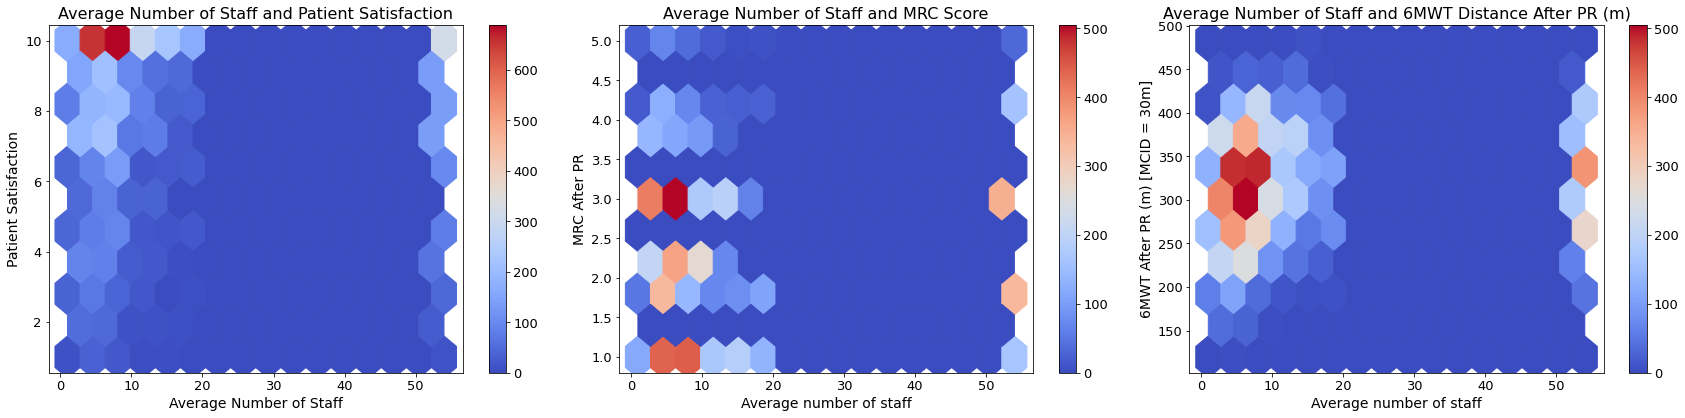

In [59]:
#Hexbin plot - Comparing average number of staff with patient outcomes
fig,axs = plt.subplots(1,3,figsize=(24,6))

scat0 = axs[0].hexbin(x = merged_df['Average number of staff'], y = merged_df['Patient satisfaction'],gridsize=(15,5),
                     cmap = 'coolwarm')
axs[0].set_title('Average Number of Staff and Patient Satisfaction',fontsize=16)
axs[0].set_xlabel('Average Number of Staff',fontsize=14)
axs[0].set_ylabel('Patient Satisfaction',fontsize=14)
fig.colorbar(scat0,ax=axs[0])

scat1 = axs[1].hexbin(x = merged_df['Average number of staff'], y = merged_df['MRC After PR'],gridsize=(15,5),
                     cmap = 'coolwarm')
axs[1].set_title('Average Number of Staff and MRC Score',fontsize=16)
axs[1].set_xlabel('Average number of staff',fontsize=14)
axs[1].set_ylabel('MRC After PR',fontsize=14)
fig.colorbar(scat1,ax=axs[1])

scat2 = axs[2].hexbin(x = merged_df['Average number of staff'], y = merged_df['6MWT After PR (m) [MCID = 30m]'],gridsize=(15,5),
                     cmap='coolwarm')
axs[2].set_title('Average Number of Staff and 6MWT Distance After PR (m)',fontsize=16)
axs[2].set_xlabel('Average number of staff',fontsize=14)
axs[2].set_ylabel('6MWT After PR (m) [MCID = 30m]',fontsize=14)
fig.colorbar(scat1,ax=axs[2])

plt.tight_layout()
plt.show()

In [60]:
corr_1 = merged_df['Average number of staff'].corr(merged_df['Patient satisfaction'])
corr_2 = merged_df['Average number of staff'].corr(merged_df['MRC After PR'])
corr_3 = merged_df['Average number of staff'].corr(merged_df['6MWT After PR (m) [MCID = 30m]'])
print(corr_1) #not correlated
print(corr_2) #not correlated
print(corr_3)#slight correlation

-0.023550709686803197
0.062234792522768305
0.08935736472894668


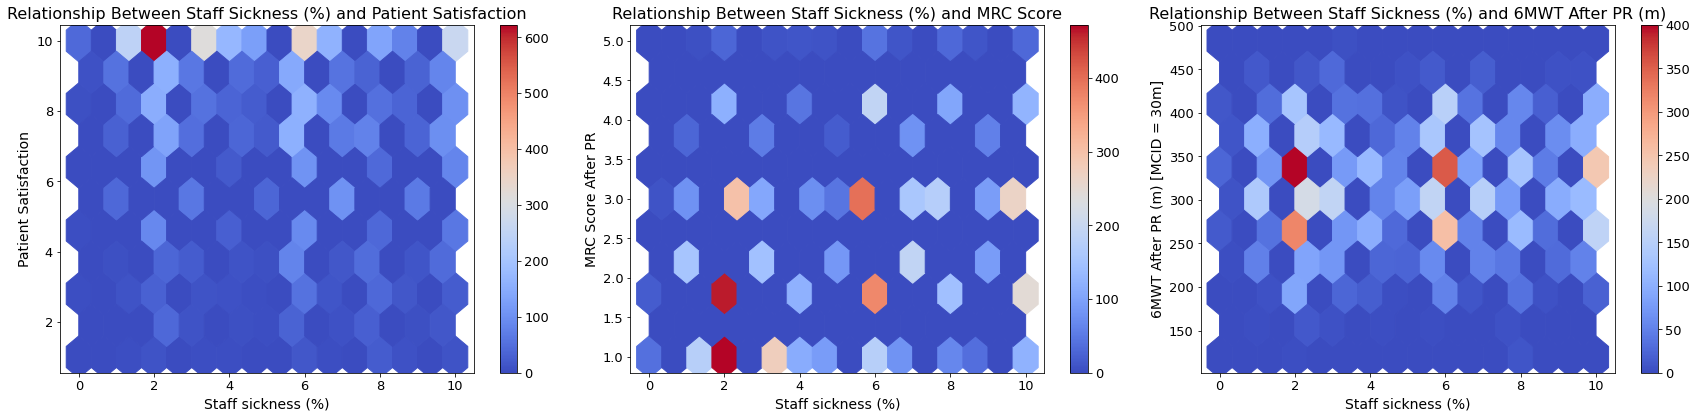

In [61]:
#Comparing staff sickness (%) with patient outcomes

fig,axs = plt.subplots(1,3,figsize=(24,6))

scat4 = axs[0].hexbin(x = merged_df['Staff sickness %'], y = merged_df['Patient satisfaction'],gridsize=(15,5),
                     cmap='coolwarm')
axs[0].set_title('Relationship Between Staff Sickness (%) and Patient Satisfaction',fontsize=16)
axs[0].set_xlabel('Staff sickness (%)',fontsize=14)
axs[0].set_ylabel('Patient Satisfaction',fontsize=14)
fig.colorbar(scat4,ax=axs[0])

scat5 = axs[1].hexbin(x = merged_df['Staff sickness %'], y = merged_df['MRC After PR'],gridsize=(15,5),
                     cmap='coolwarm')
axs[1].set_title('Relationship Between Staff Sickness (%) and MRC Score',fontsize=16)
axs[1].set_xlabel('Staff sickness (%)',fontsize=14)
axs[1].set_ylabel('MRC Score After PR',fontsize=14)
fig.colorbar(scat5,ax=axs[1])

scat6 = axs[2].hexbin(x = merged_df['Staff sickness %'], y = merged_df['6MWT After PR (m) [MCID = 30m]'],gridsize=(15,5),
                     cmap='coolwarm')
axs[2].set_title('Relationship Between Staff Sickness (%) and 6MWT After PR (m)',fontsize=16)
axs[2].set_xlabel('Staff sickness (%)',fontsize=14)
axs[2].set_ylabel('6MWT After PR (m) [MCID = 30m]',fontsize=14)
fig.colorbar(scat6,ax=axs[2])

plt.tight_layout()
plt.show()

In [62]:
corr_1 = merged_df['Staff sickness %'].corr(merged_df['Patient satisfaction'])
corr_2 = merged_df['Staff sickness %'].corr(merged_df['MRC After PR'])
corr_3 = merged_df['Staff sickness %'].corr(merged_df['6MWT After PR (m) [MCID = 30m]'])
print(corr_1) #Not correlated
print(corr_2) #Slight correlated
print(corr_3)# Not correlated

-0.1707968231052841
0.2508216142277053
0.029389960963635064


In [63]:
merged_df

,County,Patient identifier,Gender,Referred,Assessed,Referral date,Assessment date,Enrolment date,Completion date,Age,...,Exercise plan given at discharge?,MRC Before PR,MRC After PR,Patient satisfaction,Region,Average number of staff,Staff sickness %,Time Difference,Time Difference (Days),Not Referred but Assessed
0,Surrey,51,Male,Yes,Yes,2018-08-31,2019-01-19,2019-02-02,2019-03-11,60.0,...,Yes,4,1.0,10,KSS,14,3.0,37 days,37,False
2,Surrey,64,Male,Yes,Yes,2018-11-26,2019-01-28,2019-02-04,2019-03-20,52.0,...,Yes,4,1.0,10,KSS,14,3.0,44 days,44,False
3,Surrey,185,Male,Yes,Yes,2018-04-03,2018-05-15,2018-05-30,2018-07-08,68.0,...,Yes,3,1.0,10,KSS,14,3.0,39 days,39,False
4,Surrey,188,Female,Yes,Yes,2018-08-02,2018-08-11,2018-08-27,2018-10-11,56.0,...,Yes,4,1.0,10,KSS,14,3.0,45 days,45,False
5,Surrey,195,Female,Yes,Yes,2018-10-16,2019-01-20,2019-02-09,2019-03-11,71.0,...,Yes,3,1.0,8,KSS,14,3.0,30 days,30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12044,Oxfordshire,11822,Female,Yes,Yes,2018-04-29,2018-07-10,2018-07-27,2018-09-09,57.0,...,Yes,3,2.0,5,RoC,2,3.0,44 days,44,False
12046,Oxfordshire,11887,Female,Yes,Yes,2018-07-25,2018-12-03,2018-12-16,2019-01-29,57.0,...,Yes,3,2.0,6,RoC,2,3.0,44 days,44,False
12047,Oxfordshire,11949,Female,Yes,Yes,2018-02-13,2019-09-12,2019-09-30,2019-11-09,78.0,...,Yes,5,5.0,2,RoC,2,3.0,40 days,40,False
12050,Oxfordshire,12009,Male,Yes,Yes,2018-11-11,2019-01-28,2019-02-10,2019-03-07,63.0,...,Yes,3,2.0,5,RoC,2,3.0,25 days,25,False


In [64]:
#Summary Statistics - create to new variables

sickness_0_4 = merged_df.loc[(merged_df['Staff sickness %'] >= 0) & (merged_df['Staff sickness %'] <=4)]
sickness_5_10 = merged_df.loc[(merged_df['Staff sickness %'] >=5) & (merged_df['Staff sickness %'] <=10)]

mean_sickness_0_4 = sickness_0_4['6MWT After PR (m) [MCID = 30m]'].mean()
print("The mean 6MWT After PR for staff sickness (0-4%): ", mean_sickness_0_4)

mean_sickness_5_10 = sickness_5_10['6MWT After PR (m) [MCID = 30m]'].mean()
print("The mean 6MWT After PR for staff sickness (5-10%): ", mean_sickness_5_10)

mean_sickness_0_4 = sickness_0_4['MRC After PR'].mean()
print("The men MRC Score for staff sickness (0-4%): ", mean_sickness_0_4)

mean_sickness_5_10 = sickness_5_10['MRC After PR'].mean()
print("The mean MRC Score for staff sickness (5-10%): ", mean_sickness_5_10)

mean_sickness_0_4 = sickness_0_4['Patient satisfaction'].mean()
print("The mean Patient satisfaction staff sickness (0-4%): ", mean_sickness_0_4)

mean_sickness_5_10 = sickness_5_10['Patient satisfaction'].mean()
print("The mean patient satisfaction staff sickness (5-10%): ", mean_sickness_5_10)

The mean 6MWT After PR for staff sickness (0-4%):  312.7445666197439
The mean 6MWT After PR for staff sickness (5-10%):  318.3014762735876
The men MRC Score for staff sickness (0-4%):  2.0471498944405346
The mean MRC Score for staff sickness (5-10%):  2.594929577464789
The mean Patient satisfaction staff sickness (0-4%):  8.292751583391977
The mean patient satisfaction staff sickness (5-10%):  7.446760563380281


In [65]:
#Summary statistics - Create new variables

staff_0_10 = merged_df.loc[(merged_df['Average number of staff'] >= 0) & (merged_df['Average number of staff'] <=10)]
staff_11_20 = merged_df.loc[(merged_df['Average number of staff'] >=11) & (merged_df['Average number of staff'] <=20)]
staff_21plus = merged_df.loc[(merged_df['Average number of staff'] >=21)]

mean_staff_0_10 = staff_0_10['6MWT After PR (m) [MCID = 30m]'].mean()
print("The mean 6MWT After PR for staff levels (0-10)): ", mean_staff_0_10)

mean_staff_11_20 = staff_11_20['6MWT After PR (m) [MCID = 30m]'].mean()
print("The mean 6MWT After PR for staff levels (11-20): ", mean_staff_11_20)

mean_staff_21plus = staff_21plus['6MWT After PR (m) [MCID = 30m]'].mean()
print("The mean 6MWT After PR for staff levels (21+): ", mean_staff_21plus)

mean_staff_0_10 = staff_0_10['Patient satisfaction'].mean()
print("The mean patient satisfaction for staff levels (0-10)): ", mean_staff_0_10)

mean_staff_11_20 = staff_11_20['Patient satisfaction'].mean()
print("The mean patient satisfaction for staff levels (11-20): ", mean_staff_11_20)

mean_staff_21plus = staff_21plus['Patient satisfaction'].mean()
print("The mean patient satisfaction for staff levels (21+): ", mean_staff_21plus)

mean_staff_0_10 = staff_0_10['MRC After PR'].mean()
print("The mean patient satisfaction for staff levels (0-10)): ", mean_staff_0_10)

mean_staff_11_20 = staff_11_20['MRC After PR'].mean()
print("The mean patient satisfaction for staff levels (11-20): ", mean_staff_11_20)

mean_staff_21plus = staff_21plus['MRC After PR'].mean()
print("The mean patient satisfaction for staff levels (21+): ", mean_staff_21plus)



The mean 6MWT After PR for staff levels (0-10)):  309.81057527520716
The mean 6MWT After PR for staff levels (11-20):  332.99878154022747
The mean 6MWT After PR for staff levels (21+):  322.11500974659054
The mean patient satisfaction for staff levels (0-10)):  7.763790664780764
The mean patient satisfaction for staff levels (11-20):  8.347511312217195
The mean patient satisfaction for staff levels (21+):  7.508133971291866
The mean patient satisfaction for staff levels (0-10)):  2.3597359735973598
The mean patient satisfaction for staff levels (11-20):  2.1040723981900453
The mean patient satisfaction for staff levels (21+):  2.5789473684210527


# What recommendations would you make to the programme nationally and why?

See presentation.

# The code below contains analysis I had conducted but does not fit in my presentation. Instead of deleting it, I will place it down here.

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12196\4102531753.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-k" (-> linestyle='-'). The keyword argument will take precedence.
  axs[0].plot(x_values_6MWT_p, slope_6MWT_p*x_values_6MWT_p+intercept_6MWT_p, '-k',lw=3, ls = 'dashed',label='Regression Line')
C:\Users\Andrew\AppData\Local\Temp\ipykernel_12196\4102531753.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-b" (-> linestyle='-'). The keyword argument will take precedence.
  axs[1].plot(x_values_6MWT_np, slope_6MWT_np*x_values_6MWT_np+intercept_6MWT_np, '-b', lw=3, ls = 'dashed',label='Regression Line')


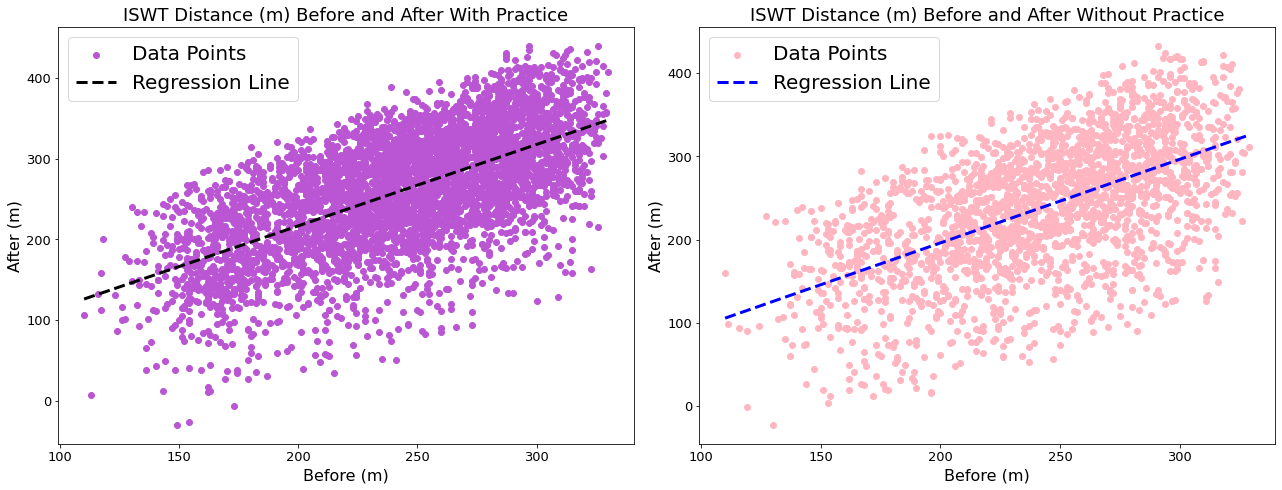

In [66]:
slope_6MWT_p, intercept_6MWT_p, r_value_6MWT_p, p_value_6MWT_p, std_err_6MWT_p = linregress(yes_practice['ISWT Before PR (m)'],
                                                                yes_practice['ISWT After PR (m) [MCID = 48m]'])
slope_6MWT_np, intercept_6MWT_np, r_value_6MWT_np, p_value_6MWT_np, std_err_6MWT_np = linregress(no_practice['ISWT Before PR (m)'],
                                                                no_practice['ISWT After PR (m) [MCID = 48m]'])
x_values_6MWT_p = np.linspace(yes_practice['ISWT Before PR (m)'].min(), yes_practice['ISWT Before PR (m)'].max(), len(no_practice))
x_values_6MWT_np = np.linspace(no_practice['ISWT Before PR (m)'].min(), no_practice['ISWT Before PR (m)'].max(), len(yes_practice))

fig, axs = plt.subplots(1, 2, figsize=(18,7))

# create scatter plot &regression line for 6MWT test
axs[0].scatter(yes_practice['ISWT Before PR (m)'], yes_practice['ISWT After PR (m) [MCID = 48m]'], color='mediumorchid',label='Data Points')
axs[0].plot(x_values_6MWT_p, slope_6MWT_p*x_values_6MWT_p+intercept_6MWT_p, '-k',lw=3, ls = 'dashed',label='Regression Line')
axs[0].legend(bbox_to_anchor=(0,1),loc='upper left',ncol=1,fontsize=20)
axs[0].set_title('ISWT Distance (m) Before and After With Practice',fontsize=18)
axs[0].set_xlabel('Before (m)',fontsize=16)
axs[0].set_ylabel('After (m)',fontsize=16)

# create scatter plot & regression line for ISWT test
axs[1].scatter(x=no_practice['ISWT Before PR (m)'], y=no_practice['ISWT After PR (m) [MCID = 48m]'],label='Data Points',c='lightpink')
axs[1].plot(x_values_6MWT_np, slope_6MWT_np*x_values_6MWT_np+intercept_6MWT_np, '-b', lw=3, ls = 'dashed',label='Regression Line')
axs[1].legend(bbox_to_anchor=(0,1),loc='upper left',ncol=1,fontsize=20)
axs[1].set_title('ISWT Distance (m) Before and After Without Practice',fontsize=18)
axs[1].set_xlabel('Before (m)',fontsize=16)
axs[1].set_ylabel('After (m)',fontsize=16)

plt.tight_layout()
plt.show()

Text(0, 0.5, '6MWT After PR (m) [MCID = 30m]')

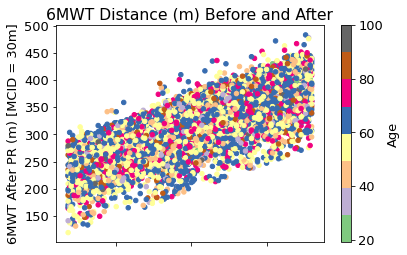

In [67]:
ax = (merged_df
    .plot.scatter(x='6MWT Before PR (m)',y = '6MWT After PR (m) [MCID = 30m]',
                 c='Age',cmap = 'Accent')
)
ax.set_title('6MWT Distance (m) Before and After')
ax.set_xlabel('6MWT Before PR (m)')
ax.set_ylabel('6MWT After PR (m) [MCID = 30m]')

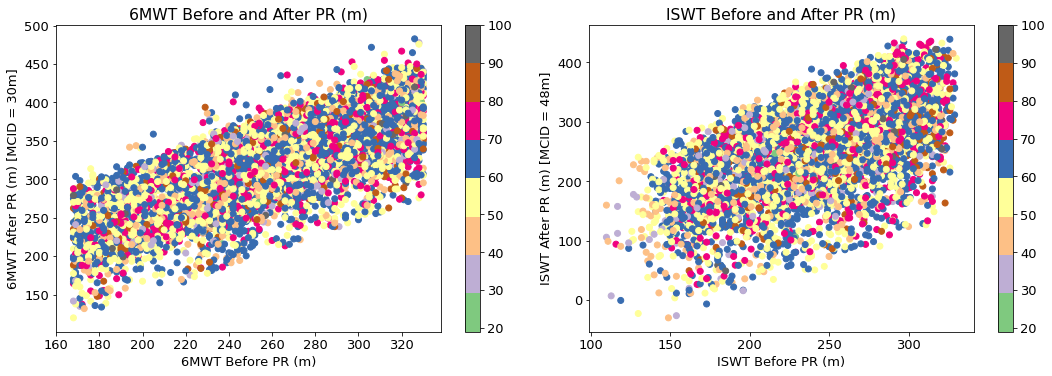

In [68]:
#Create 2 subplots
fig,axs = plt.subplots(1,2,figsize=(15,5))
plt.tight_layout()


scat0 = axs[0].scatter(merged_df['6MWT Before PR (m)'], merged_df['6MWT After PR (m) [MCID = 30m]'],
              c=merged_df['Age'],cmap='Accent')
axs[0].set_title('6MWT Before and After PR (m)')
axs[0].set_xlabel('6MWT Before PR (m)',fontsize=13)
axs[0].set_ylabel('6MWT After PR (m) [MCID = 30m]',fontsize=13)
fig.colorbar(scat0,ax=axs[0])

scat1 = axs[1].scatter(merged_df['ISWT Before PR (m)'], merged_df['ISWT After PR (m) [MCID = 48m]'],
              c=merged_df['Age'],cmap='Accent')
axs[1].set_title('ISWT Before and After PR (m)')
axs[1].set_xlabel('ISWT Before PR (m)',fontsize=13)
axs[1].set_ylabel('ISWT After PR (m) [MCID = 48m]',fontsize=13)
fig.colorbar(scat1,ax=axs[1])

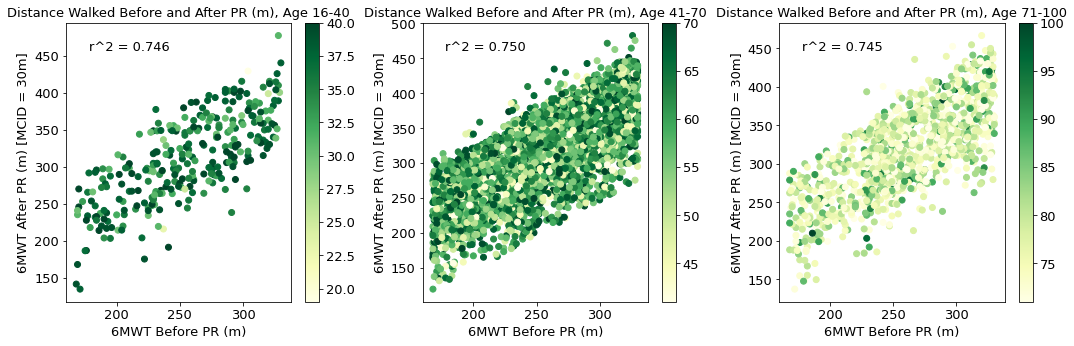

In [69]:
#The data above is a bit clunky. The dominant age ranges are yellow,blue and pink, ranging from 50-80 years. 
#I will create 3 subplots filtering the age from 16-40, 41-70 and 71-100 to get a better idea of how different
#age ranges respond to the programme

df_16_40 = merged_df.loc[(merged_df['Age'] >=16) & (merged_df['Age'] <=40)]
df_41_70 = merged_df.loc[(merged_df['Age'] >=41) & (merged_df['Age'] <=70)]
df_71_100 = merged_df.loc[(merged_df['Age'] >=71) & (merged_df['Age'] <=100)]


#Create 3 subplots
fig,axs = plt.subplots(1,3,figsize=(15,5))

#Scatter plot for age range 16-40
scat0 = axs[0].scatter(df_16_40['6MWT Before PR (m)'], df_16_40['6MWT After PR (m) [MCID = 30m]'],
              c=df_16_40['Age'],cmap='YlGn')
axs[0].set_title('Distance Walked Before and After PR (m), Age 16-40',fontsize=13)
axs[0].set_xlabel('6MWT Before PR (m)',fontsize=13)
axs[0].set_ylabel('6MWT After PR (m) [MCID = 30m]',fontsize=13)
axs[0].annotate('r^2 = 0.746', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13)
fig.colorbar(scat0,ax=axs[0])

#Scatter plot for age range 41-70
scat1 = axs[1].scatter(df_41_70['6MWT Before PR (m)'], df_41_70['6MWT After PR (m) [MCID = 30m]'],
              c=df_41_70['Age'],cmap='YlGn')
axs[1].set_title('Distance Walked Before and After PR (m), Age 41-70',fontsize=13)
axs[1].set_xlabel('6MWT Before PR (m)',fontsize=13)
axs[1].set_ylabel('6MWT After PR (m) [MCID = 30m]',fontsize=13)
axs[1].annotate('r^2 = 0.750', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13)
fig.colorbar(scat1,ax=axs[1])

#Scatter plot for age range 71-100
scat2 = axs[2].scatter(df_71_100['6MWT Before PR (m)'], df_71_100['6MWT After PR (m) [MCID = 30m]'],
              c=df_71_100['Age'],cmap='YlGn')
axs[2].set_title('Distance Walked Before and After PR (m), Age 71-100',fontsize=13)
axs[2].set_xlabel('6MWT Before PR (m)',fontsize=13)
axs[2].set_ylabel('6MWT After PR (m) [MCID = 30m]',fontsize=13)
axs[2].annotate('r^2 = 0.745', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13)
fig.colorbar(scat2,ax=axs[2])

plt.tight_layout()
plt.show()

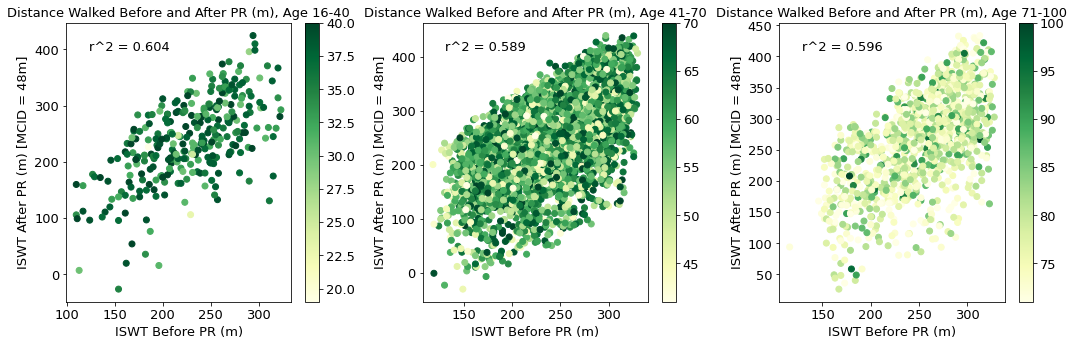

In [70]:
#Comparing ISWt age ranges

#Create 3 subplots
fig,axs = plt.subplots(1,3,figsize=(15,5))

#Scatter plot for age range 16-40
scat0 = axs[0].scatter(df_16_40['ISWT Before PR (m)'], df_16_40['ISWT After PR (m) [MCID = 48m]'],
              c=df_16_40['Age'],cmap='YlGn')
axs[0].set_title('Distance Walked Before and After PR (m), Age 16-40',fontsize=13)
axs[0].set_xlabel('ISWT Before PR (m)',fontsize=13)
axs[0].set_ylabel('ISWT After PR (m) [MCID = 48m]',fontsize=13)
axs[0].annotate('r^2 = 0.604', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13)
fig.colorbar(scat0,ax=axs[0])

scat1 = axs[1].scatter(df_41_70['ISWT Before PR (m)'], df_41_70['ISWT After PR (m) [MCID = 48m]'],
              c=df_41_70['Age'],cmap='YlGn')
axs[1].set_title('Distance Walked Before and After PR (m), Age 41-70',fontsize=13)
axs[1].set_xlabel('ISWT Before PR (m)',fontsize=13)
axs[1].set_ylabel('ISWT After PR (m) [MCID = 48m]',fontsize=13)
axs[1].annotate('r^2 = 0.589', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13)
fig.colorbar(scat1,ax=axs[1])

scat2 = axs[2].scatter(df_71_100['ISWT Before PR (m)'], df_71_100['ISWT After PR (m) [MCID = 48m]'],
              c=df_71_100['Age'],cmap='YlGn')
axs[2].set_title('Distance Walked Before and After PR (m), Age 71-100',fontsize=13)
axs[2].set_xlabel('ISWT Before PR (m)',fontsize=13)
axs[2].set_ylabel('ISWT After PR (m) [MCID = 48m]',fontsize=13)
axs[2].annotate('r^2 = 0.596', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=13)
fig.colorbar(scat2,ax=axs[2])

plt.tight_layout()
plt.show()

In [71]:
# calculate the correlation coefficient between 6MWT before and after
corr_6MWT_16_40 = df_16_40['6MWT Before PR (m)'].corr(df_16_40['6MWT After PR (m) [MCID = 30m]'])
corr_6MWT_41_70 = df_41_70['6MWT Before PR (m)'].corr(df_41_70['6MWT After PR (m) [MCID = 30m]'])
corr_6MWT_71_100 = df_71_100['6MWT Before PR (m)'].corr(df_71_100['6MWT After PR (m) [MCID = 30m]'])
print("The correlation coefficient for 6MWT (16-40) is: ", corr_6MWT_16_40)
print("The correlation coefficient for 6MWT (41-70) is: ", corr_6MWT_41_70)
print("The correlation coefficient for 6MWT (71-100) is: ", corr_6MWT_71_100)

# calculate the correlation coefficient between ISWT before and after
corr_ISWT_16_40 = df_16_40['ISWT Before PR (m)'].corr(df_16_40['ISWT After PR (m) [MCID = 48m]'])
corr_ISWT_41_70 = df_41_70['ISWT Before PR (m)'].corr(df_41_70['ISWT After PR (m) [MCID = 48m]'])
corr_ISWT_71_100 = df_71_100['ISWT Before PR (m)'].corr(df_71_100['ISWT After PR (m) [MCID = 48m]'])
print("The correlation coefficient for ISWT (16-40) is: ", corr_ISWT_16_40)
print("The correlation coefficient for ISWT (41-70) is: ", corr_ISWT_41_70)
print("The correlation coefficient for ISWT (71-100) is: ", corr_ISWT_71_100)

print('For each range of ages, we see that 6MWT produces a better correlation with results after pulmonary rehabilitation than ISWT')

The correlation coefficient for 6MWT (16-40) is:  0.7458849968502531
The correlation coefficient for 6MWT (41-70) is:  0.751160247575108
The correlation coefficient for 6MWT (71-100) is:  0.7443982813820157
The correlation coefficient for ISWT (16-40) is:  0.6164777076397218
The correlation coefficient for ISWT (41-70) is:  0.5923653804038499
The correlation coefficient for ISWT (71-100) is:  0.5926707037495276
For each range of ages, we see that 6MWT produces a better correlation with results after pulmonary rehabilitation than ISWT


In [72]:
#slope_6MWT_16_40, intercept_6MWT_16_40, r_value_6MWT_16_40, p_value_6MWT_16_40, std_err_6MWT_16_40 = linregress(sixMWT_16_40['6MWT Before PR (m)', sixMWT1_16_40['6MWT After PR (m) [MCID = 30m]']])
#slope_6MWT_41_70, intercept_6MWT_41_70, r_value_6MWT_41_70, p_value_6MWT_41_70, std_err_6MWT_41_70 = linregress(sixMWT_41_70['6MWT Before PR (m)', sixMWT1_41_70['6MWT After PR (m) [MCID = 30m]']])
#slope_6MWT_71_100, intercept_6MWT_71_100, r_value_6MWT_71_100, p_value_6MWT_71_100, std_err_6MWT_71_100 = linregress(sixMWT_71_100['6MWT Before PR (m)', sixMWT1_71_100['6MWT After PR (m) [MCID = 30m]']])
                                                                                                                                                                                                                                                          

mean_6MWT_16_40 = sixMWT_16_40['6MWT After PR (m) [MCID = 30m]'].mean()
print("The mean for 16-40 6MWT is: ", mean_6MWT_16_40)

mean_6MWT_41_70 = sixMWT_41_70['6MWT After PR (m) [MCID = 30m]'].mean()
print("The mean for 6MWT 41-70 is: ", mean_6MWT_41_70)

mean_6MWT_71_100 = sixMWT_71_100['6MWT After PR (m) [MCID = 30m]'].mean()
print("The mean for 6MWT 71-100 is: ", mean_6MWT_71_100)

#print("The y-intercept for 16-40 6MWT is: ", intercept_6MWT_16_40)
#print("The y-intercept for 41-70 6MWT is: ", intercept_6MWT_41_70)
#print("The y-intercept for 71-100 6MWT is: ", intercept_6MWT_71_100)

stdev_6MWT_16_40 = sixMWT_16_40['6MWT After PR (m) [MCID = 30m]'].std()
print("The stdev for 16-40 6MWT is: ", stdev_6MWT_16_40)

stdev_6MWT_41_70 = sixMWT_41_70['6MWT After PR (m) [MCID = 30m]'].std()
print("The stdev for 6MWT 41-70 is: ", stdev_6MWT_41_70)

stdev_6MWT_71_100 = sixMWT_71_100['6MWT After PR (m) [MCID = 30m]'].std()
print("The stdev for 6MWT 71-100 is: ", stdev_6MWT_71_100)

median_6MWT_16_40 = sixMWT_16_40['6MWT After PR (m) [MCID = 30m]'].median()
print("The median for 16-40 6MWT is: ", median_6MWT_16_40)

median_6MWT_41_70 = sixMWT_41_70['6MWT After PR (m) [MCID = 30m]'].median()
print("The median for 6MWT 41-70 is: ", median_6MWT_41_70)

median_6MWT_71_100 = sixMWT_71_100['6MWT After PR (m) [MCID = 30m]'].median()
print("The median for 6MWT 71-100 is: ", median_6MWT_71_100)


NameError: name 'sixMWT_16_40' is not defined